Done by:
Paula Gambus i Moreno |
Nerea Suarez Caballero |
Fernando Augusto Marina Urriola

# PROJECT 1

## Imports

In [ ]:
# !pip install matplotlib
# !pip install seaborn
# !pip install numpy
# !pip install ydata-profiling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#import pyreadstat
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
# from ydata_profiling import ProfileReport
import math

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn import linear_model

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

import warnings

# Desactivar todos los warnings
warnings.filterwarnings('ignore')

# Tu código va aquí

# Para reactivar los warnings (opcional)
##warnings.filterwarnings('default')


pd.options.display.max_rows=200
pd.options.display.max_colwidth=500

## Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_DM_PROJECT/heart.csv')
# df = pd.read_csv('/content/drive/MyDrive/ML_DM_PROJECT/heart.csv') #paula

# remove duplicat values
df = df.drop_duplicates(ignore_index=True)


In [ ]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
#You are replacing all the 0 values
#in the ‘thall’ column of a pandas DataFrame with 2,
#and then creating a one-hot encoded version of the
#DataFrame using the pd.get_dummies() function.
#The columns parameter specifies that only the ‘thall’ column
#should be one-hot encoded. The resulting DataFrame one_hot_encoded_data
#will have a binary column for each unique value in the ‘thall’
#column, with a value of 1 indicating that the original value was
#present in that row, and 0 indicating that it was not 1.

df['thall'] = df['thall'].replace(0, 2)

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['thall'])
one_hot_encoded_data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,thall_0,thall_1,thall_2,thall_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,0,0,1,0


## EDA

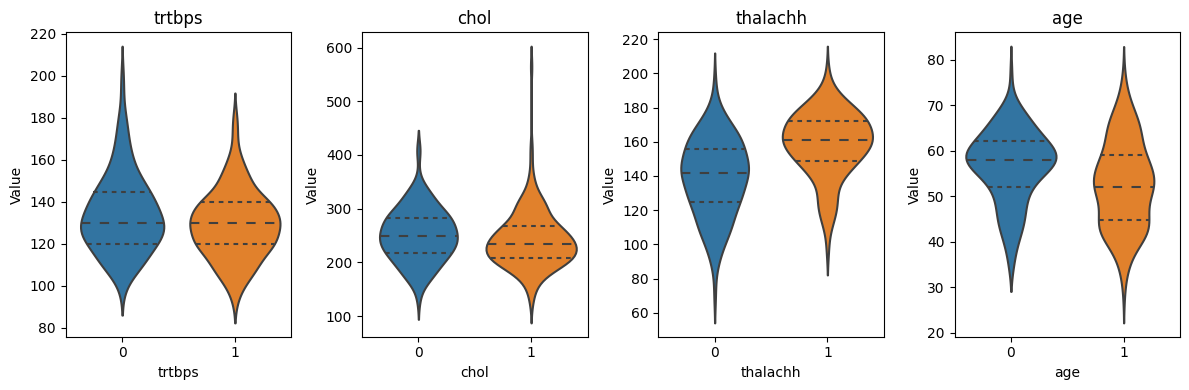

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

pdf_pages = PdfPages('violin_age_added.pdf')

columnas_numericas = ['trtbps', 'chol', 'thalachh', 'age']

fig, axs = plt.subplots(nrows=1, ncols=len(columnas_numericas), figsize=(12, 4))

custom_palette = sns.color_palette("tab10")

for i, col in enumerate(columnas_numericas):
    # Create a violin plot for the current column and add "age" as a separate category
    sns.violinplot(x='output', y=df[col], data=df, ax=axs[i], inner="quartile", palette=custom_palette)
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Value')

plt.tight_layout()

pdf_pages.savefig(fig)

pdf_pages.close()

plt.show()


In [ ]:
#df.drop(['output'], axis=1, inplace=True)
#df.columns

In [ ]:
con_cols = ["age","trtbps","chol","thalachh"]
df_Esta=df[con_cols].describe().transpose()
#estadisticas basicas de las continuas

In [ ]:
df_corr = df[con_cols].corr().transpose()
#correlacion

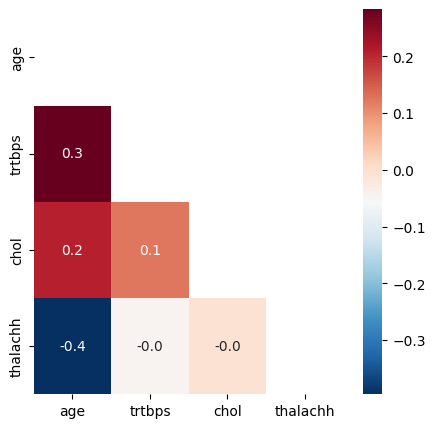

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

# Crear la figura y el eje
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0, 0])

# Crear la matriz de correlación
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr, mask=mask, fmt=".1f", annot=True, cmap='RdBu_r', cbar=True, ax=ax0)

# Eliminar el título
ax0.set_title('')

# Guardar la figura en un archivo PDF
pdf_pages = PdfPages('correlation_matrix.pdf')
pdf_pages.savefig(fig)
pdf_pages.close()

# Mostrar la figura en la libreta (opcional)
plt.show()


<Figure size 500x500 with 0 Axes>

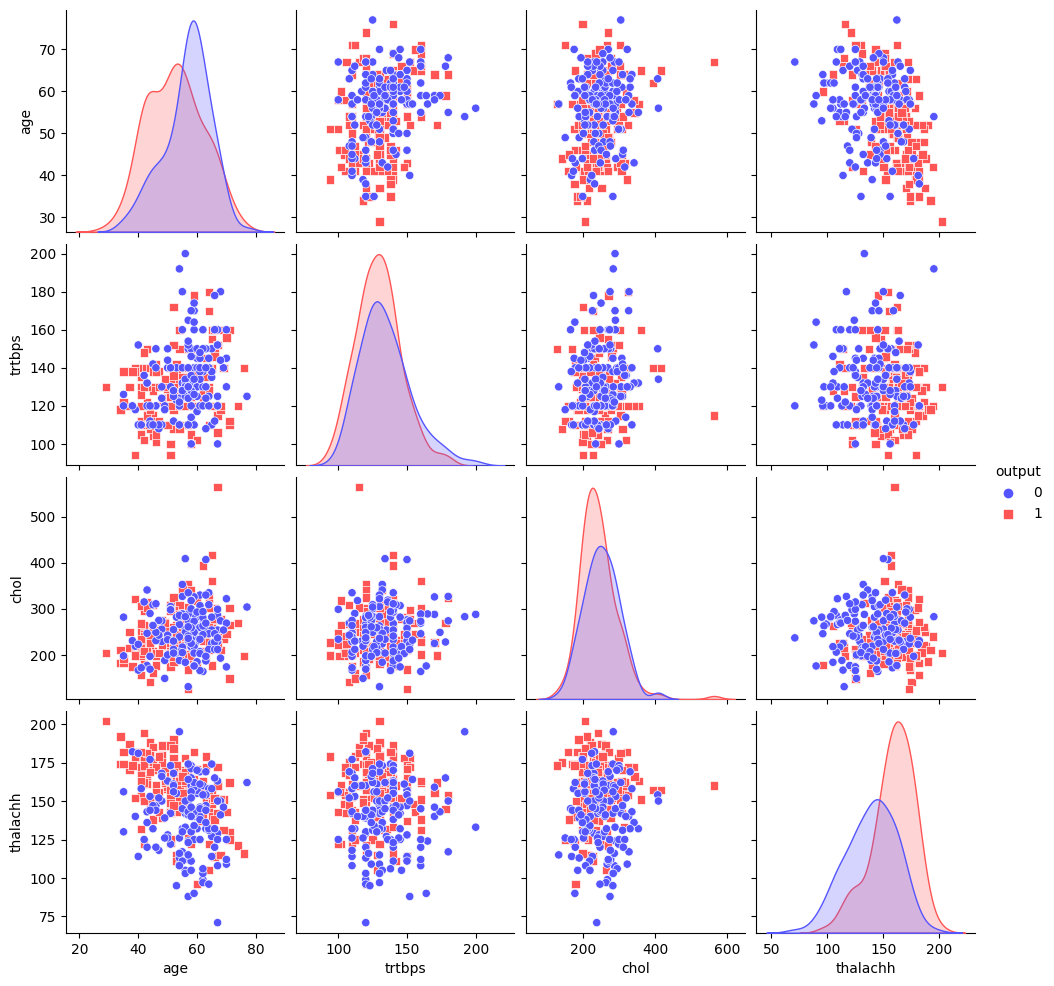

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

con_cols = ["age","trtbps","chol","thalachh", "output"]
plt.figure(figsize=(5, 5))
sns.pairplot(df[con_cols], hue="output", markers=["o", "s"], palette="seismic")
plt.savefig("pairplot.pdf")  # Guardar el plot como PDF
plt.show()


## PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
X = df.iloc[:,0:13].values

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# covariance matrix
cov_mat = np.cov(X_scaled.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.31140658  0.41003707  0.1489487   0.56869202 -0.10054879 -0.01378481
  -0.13589171  0.33138593  0.07100238  0.21614446 -0.2808242   0.34640566
  -0.00985275]
 [-0.09495415 -0.37275683  0.05482129 -0.00483431  0.53871317 -0.28490548
  -0.27199442 -0.03194256 -0.03922316  0.20056541 -0.17961443  0.13052836
  -0.55817477]
 [ 0.27291261  0.29636385  0.01876099 -0.11721212  0.37774022  0.27839401
   0.58011073 -0.11035315  0.18350841  0.23814784  0.04051384  0.37518316
  -0.14800623]
 [-0.18365979  0.43611531  0.03420239 -0.26557983  0.20180938  0.02863588
  -0.05623108 -0.18827363  0.23410596 -0.30098257 -0.57911975 -0.37368268
  -0.06164099]
 [-0.11185033  0.36445501 -0.00612728 -0.17522086 -0.41732062 -0.30579734
  -0.11723339 -0.33700641  0.16608413 -0.00367314  0.37064383  0.15624767
  -0.48943747]
 [-0.07583266  0.30983907 -0.13242034  0.03459385  0.48682172 -0.12642999
  -0.15464812  0.2085508  -0.19452965 -0.54538     0.42707709  0.1708632
   0.11071432]
 [ 0.1248

In [ ]:
#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Eigen values descendant:')
for i in eig_pairs:
    print(i[0])

Eigen values descendant:
2.786477288021095
1.550417603090989
1.2222432218706987
1.1876301950878962
1.0207479136623825
0.9547709772002814
0.8685798613058449
0.7820464891040483
0.7153357557608048
0.6310960772770404
0.5276713512690967
0.4228834039005988
0.3732892312199918


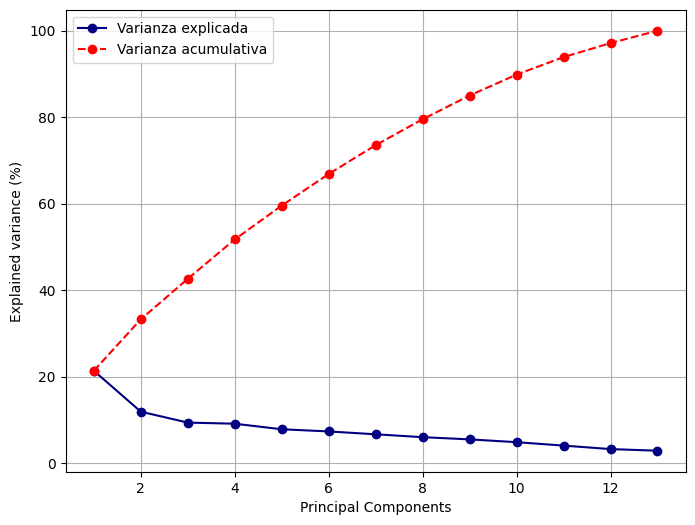

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Suponiendo que var_exp contiene los valores de varianza explicada
# por cada componente principal, y que cum_var_exp ya está calculado
total_var = sum(eig_vals)
var_exp = [(i / total_var) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Tomamos los valores de los primeros 6 componentes principales
primeros_6_var_exp = var_exp[:13]

# Creamos una lista con los índices de los primeros 6 componentes principales
indices_componentes = list(range(1, 14))

# Creamos el gráfico de línea para la varianza explicada
plt.figure(figsize=(8, 6))
plt.plot(indices_componentes, primeros_6_var_exp, marker='o', linestyle='-', color='navy', label='Varianza explicada')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance (%)')
plt.legend(loc='upper left')
plt.grid(True)

# Calculamos la varianza acumulativa
cumulative_var_exp = cum_var_exp[:13]

# Agregamos la línea de varianza acumulativa en rojo
plt.plot(indices_componentes, cumulative_var_exp, marker='o', linestyle='--', color='red', label='Varianza acumulativa')
plt.legend()

# Guardar como PDF
pdf_pages = PdfPages('explained_variance.pdf')
pdf_pages.savefig()
pdf_pages.close()

# Mostrar el gráfico en pantalla
plt.show()


In [ ]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1),
                      eig_pairs[1][1].reshape(13,1)))

print('Matriz W:\n', matrix_w)

Y = X_scaled.dot(matrix_w)

Matriz W:
 [[-0.31140658  0.41003707]
 [-0.09495415 -0.37275683]
 [ 0.27291261  0.29636385]
 [-0.18365979  0.43611531]
 [-0.11185033  0.36445501]
 [-0.07583266  0.30983907]
 [ 0.12484858 -0.21782367]
 [ 0.41494047  0.07877967]
 [-0.35997558 -0.2665195 ]
 [-0.41633891 -0.05070842]
 [ 0.3751878   0.05020592]
 [-0.28983795  0.11413491]
 [-0.22821299 -0.20799369]]


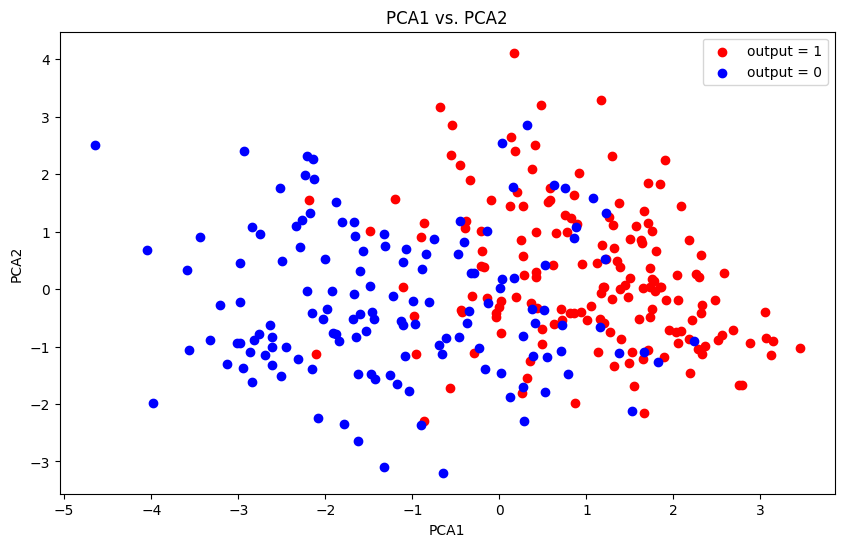

In [ ]:
data_with_heart_attack = df[df['output'] == 1]
data_without_heart_attack = df[df['output'] == 0]

# Crea la gráfica de dispersión
plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Scatter plot para personas con ataque al corazón (color rojo)
plt.scatter(Y[df['output'] == 1, 0], Y[df['output'] == 1, 1], c='red', label='output = 1')

# Scatter plot para personas sin ataque al corazón (color azul)
plt.scatter(Y[df['output'] == 0, 0], Y[df['output'] == 0, 1], c='blue', label='output = 0')

# Etiquetas de los ejes
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# Título de la gráfica
plt.title('PCA1 vs. PCA2')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


# PROJECT 2

## REGRESSION TASK - PART A

### 1) feature transformations, standarization

Transformation one-of-K Coding. (Feature ***thall***)

Firstly we will use one-hot-encoder to encode `thall`. One-hot-econder is only used for nominal features

In [ ]:
#Eliminar columnas de output (y) y de age (lo que vamos a predecir)
X = one_hot_encoded_data.drop(columns=['age','output'], axis=1)
#la salida es la age
y = one_hot_encoded_data['age']


# Crear una instancia del StandardScaler
#La instancia del objeto StandardScaler se crea con
# los parámetros predeterminados, lo que significa que se centrará
# y escalará las características para tener una media cero y una
# varianza unitaria. Luego, se crea un nuevo DataFrame llamado
# X_std con las características transformadas

scaler = StandardScaler()

# Ajustar y transformar las características (X)
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_std.head(5)

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall_0,thall_1,thall_2,thall_3
0,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-0.08165,3.972125,-1.097442,-0.795256
1,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.08165,-0.251754,0.911210,-0.795256
2,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.08165,-0.251754,0.911210,-0.795256
3,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.08165,-0.251754,0.911210,-0.795256
4,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.08165,-0.251754,0.911210,-0.795256


### *2*) regularization parameter $λ$,  generalization error for different values of $λ$ , K=10 c-v

**PREDECIMOS EDAD**


 los parámetros de regularización controlan la complejidad y la simplicidad del modelo, evitando el sobreajuste y, en algunos casos, permitiendo la selección de características. Su elección adecuada es esencial para construir modelos eficaces y generalizables.

In [ ]:
#Split 70 - 30
#X_std dataset ya escalado
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=42, test_size=0.3)

In [ ]:
#lambda_values = [0.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000]
lambda_values = np.arange(1e-3,5,0.1)

Ridge results:  {0.001: 66.3389084992247, 0.101: 66.33144719954319, 0.201: 66.32401895131163, 0.30100000000000005: 66.31662359675565, 0.401: 66.30926097910972, 0.501: 66.30193094260869, 0.6010000000000001: 66.29463333247973, 0.7010000000000001: 66.28736799493386, 0.801: 66.280134777158, 0.901: 66.27293352730689, 1.001: 66.26576409449505, 1.101: 66.2586263287891, 1.201: 66.25152008119976, 1.301: 66.2444452036742, 1.401: 66.23740154908847, 1.501: 66.23038897123988, 1.601: 66.22340732483951, 1.701: 66.21645646550482, 1.801: 66.20953624975232, 1.901: 66.20264653499031, 2.001: 66.19578717951171, 2.101: 66.18895804248687, 2.201: 66.18215898395667, 2.301: 66.17538986482538, 2.4010000000000002: 66.16865054685384, 2.501: 66.16194089265271, 2.601: 66.1552607656755, 2.701: 66.1486100302121, 2.801: 66.1419885513819, 2.9010000000000002: 66.13539619512753, 3.001: 66.12883282820799, 3.101: 66.12229831819253, 3.201: 66.11579253345411, 3.301: 66.10931534316312, 3.4010000000000002: 66.10286661728108, 3.

<Figure size 800x500 with 0 Axes>

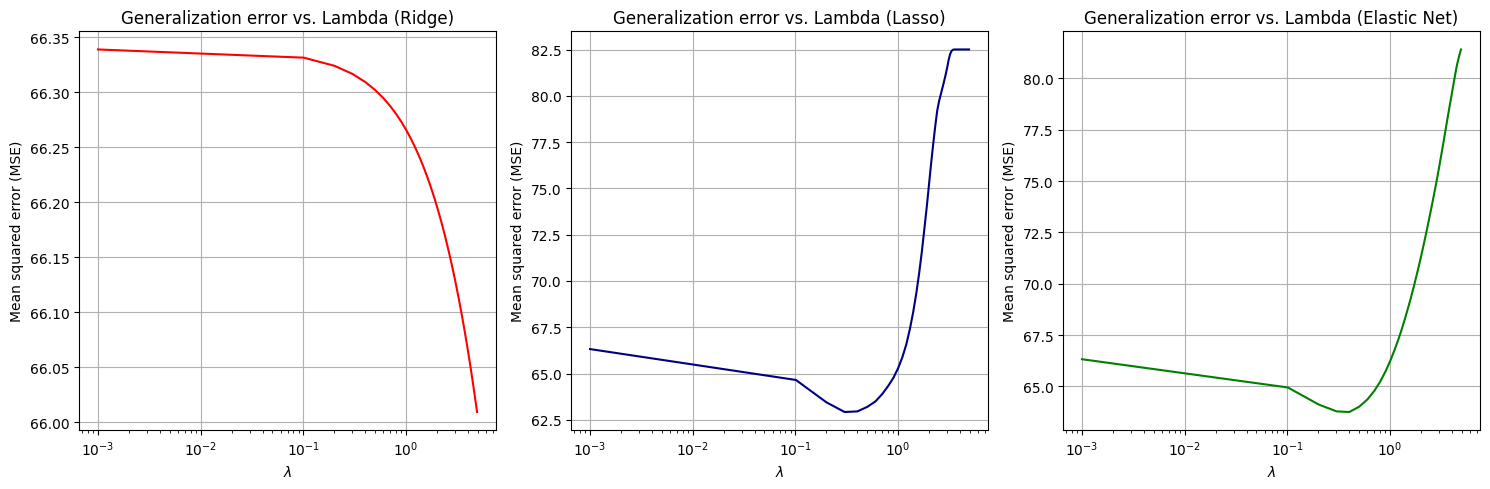

In [ ]:
# Diccionarios para almacenar los resultados de cada modelo
ridge_results = {}
lasso_results = {}
elastic_net_results = {}

# Itera a través de los valores de lambda y realiza la validación cruzada
# Para cada lambda se obtiene un resultado el qual se almacena en los diccionarios declarados arriba.
# Tres tipos de cross validation diferentes.
for lambda_val in lambda_values:
    # Ridge Model
    lr = Ridge(alpha=lambda_val)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    ridge_scores = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    ridge_mse = -np.mean(ridge_scores)
    ridge_results[lambda_val] = ridge_mse

    # Lasso Model
    lasso_model = Lasso(alpha=lambda_val)
    lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    lasso_mse = -np.mean(lasso_scores)
    lasso_results[lambda_val] = lasso_mse

    # Elastic Net Model
    elastic_net_model = ElasticNet(alpha=lambda_val, l1_ratio=0.5)  # l1_ratio = 0.5 para balancear L1 y L2
    elastic_net_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    elastic_net_mse = -np.mean(elastic_net_scores)
    elastic_net_results[lambda_val] = elastic_net_mse


print("Ridge results: ", ridge_results)
print("Lasso results: ", lasso_results)
print("ElasticNet results: ", elastic_net_results)

# Crear una figura con una fila y tres columnas
plt.figure(figsize=(8, 5))
plt.subplots(1, 3, figsize=(15, 5))

# Graficar los resultados para Ridge
plt.subplot(1, 3, 1)
plt.plot(lambda_values, list(ridge_results.values()), linestyle='-', color='red', label='Ridge')
plt.xlabel('$λ$')
plt.ylabel('Mean squared error (MSE)')
plt.title('Generalization error vs. Lambda (Ridge)')
plt.xscale('log')
plt.grid(True)

# Graficar los resultados para Lasso
plt.subplot(1, 3, 2)
plt.plot(lambda_values, list(lasso_results.values()), linestyle='-', color='navy', label='Lasso')
plt.xlabel('$λ$')
plt.ylabel('Mean squared error (MSE)')
plt.title('Generalization error vs. Lambda (Lasso)')
plt.xscale('log')
plt.grid(True)

# Graficar los resultados para Elastic Net
plt.subplot(1, 3, 3)
plt.plot(lambda_values, list(elastic_net_results.values()), linestyle='-', color='g', label='Elastic Net')
plt.xlabel('$λ$')
plt.ylabel('Mean squared error (MSE)')
plt.title('Generalization error vs. Lambda (Elastic Net)')
plt.xscale('log')
plt.grid(True)

# Ajustar los subplots para evitar solapamiento
plt.tight_layout()

# Guardar la figura como un archivo PDF
plt.savefig('combined_regression_results.pdf')

# Mostrar la figura en la pantalla
plt.show()


Ridge results:  {0.001: 66.3389084992247, 0.101: 66.33144719954319, 0.201: 66.32401895131163, 0.30100000000000005: 66.31662359675565, 0.401: 66.30926097910972, 0.501: 66.30193094260869, 0.6010000000000001: 66.29463333247973, 0.7010000000000001: 66.28736799493386, 0.801: 66.280134777158, 0.901: 66.27293352730689, 1.001: 66.26576409449505, 1.101: 66.2586263287891, 1.201: 66.25152008119976, 1.301: 66.2444452036742, 1.401: 66.23740154908847, 1.501: 66.23038897123988, 1.601: 66.22340732483951, 1.701: 66.21645646550482, 1.801: 66.20953624975232, 1.901: 66.20264653499031, 2.001: 66.19578717951171, 2.101: 66.18895804248687, 2.201: 66.18215898395667, 2.301: 66.17538986482538, 2.4010000000000002: 66.16865054685384, 2.501: 66.16194089265271, 2.601: 66.1552607656755, 2.701: 66.1486100302121, 2.801: 66.1419885513819, 2.9010000000000002: 66.13539619512753, 3.001: 66.12883282820799, 3.101: 66.12229831819253, 3.201: 66.11579253345411, 3.301: 66.10931534316312, 3.4010000000000002: 66.10286661728108, 3.

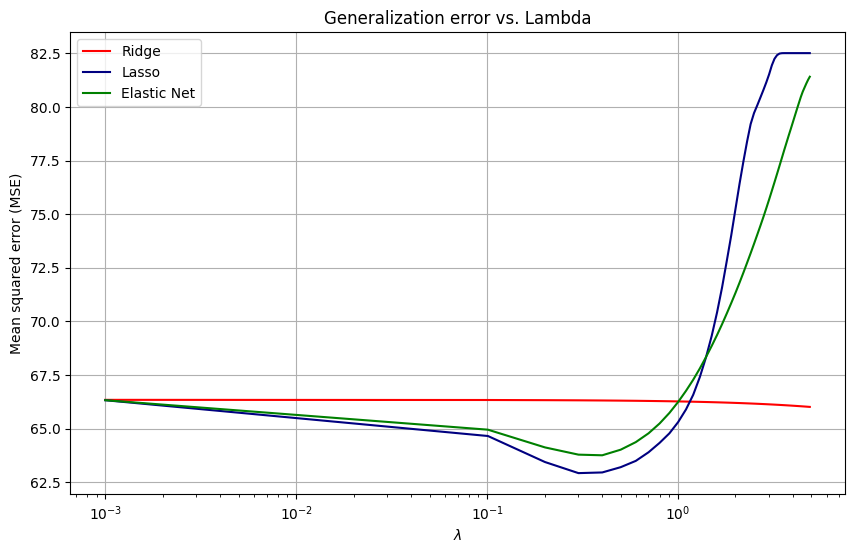

In [ ]:
# TO PLOT THE THREE RESULTS IN ONE GRAPH

# Diccionarios para almacenar los resultados de cada modelo
ridge_results = {}
lasso_results = {}
elastic_net_results = {}

# Itera a través de los valores de lambda y realiza la validación cruzada
# Para cada lambda se obtiene un resultado el qual se almacena en los diccionarios declarados arriba.
# Tres tipos de cross validation diferentes.
for lambda_val in lambda_values:
    # Ridge Model
    lr = Ridge(alpha=lambda_val)
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    ridge_scores = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    ridge_mse = -np.mean(ridge_scores)
    ridge_results[lambda_val] = ridge_mse

    # Lasso Model
    lasso_model = Lasso(alpha=lambda_val)
    lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    lasso_mse = -np.mean(lasso_scores)
    lasso_results[lambda_val] = lasso_mse

    # Elastic Net Model
    elastic_net_model = ElasticNet(alpha=lambda_val, l1_ratio=0.5)  # l1_ratio = 0.5 para balancear L1 y L2
    elastic_net_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    elastic_net_mse = -np.mean(elastic_net_scores)
    elastic_net_results[lambda_val] = elastic_net_mse


print("Ridge results: ", ridge_results)
print("Lasso results: ", lasso_results)
print("ElasticNet results: ", elastic_net_results)

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the results for Ridge
plt.plot(lambda_values, list(ridge_results.values()), linestyle='-', color='red', label='Ridge')

# Plot the results for Lasso
plt.plot(lambda_values, list(lasso_results.values()), linestyle='-', color='navy', label='Lasso')

# Plot the results for Elastic Net
plt.plot(lambda_values, list(elastic_net_results.values()), linestyle='-', color='g', label='Elastic Net')

plt.xlabel('$λ$')
plt.ylabel('Mean squared error (MSE)')
plt.title('Generalization error vs. Lambda')
plt.xscale('log')
plt.grid(True)

# Add a legend
plt.legend()

# Save the figure as a PDF file
plt.savefig('combined_regression_results.pdf')

# Show the figure on the screen
plt.show()

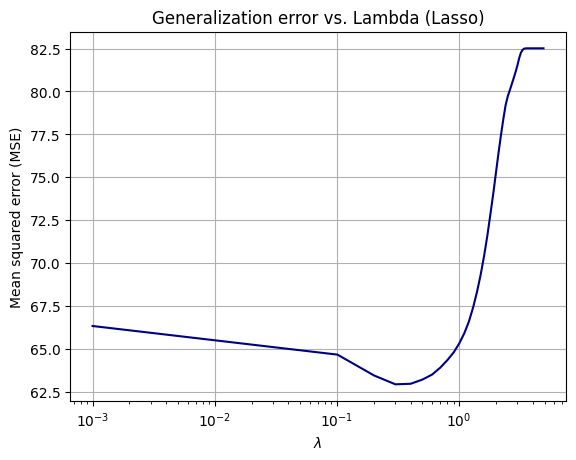

In [ ]:
# Graficar los resultados para Lasso
plt.plot(lambda_values, list(lasso_results.values()), linestyle='-', color='navy', label='Lasso')
plt.xlabel('$λ$')
plt.ylabel('Mean squared error (MSE)')
plt.title('Generalization error vs. Lambda (Lasso)')
plt.xscale('log')
plt.grid(True)
plt.savefig('lasso_vs_lambda.pdf')

plt.show()

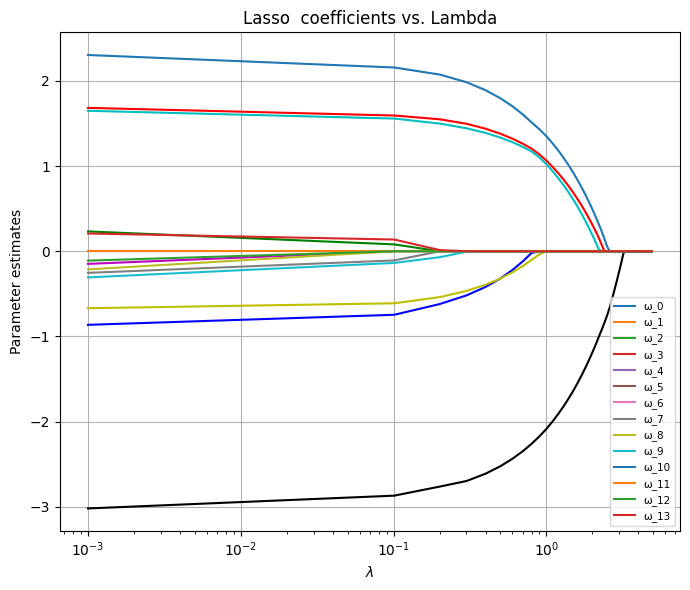

In [ ]:
lambda_values = np.arange(1e-3,5,0.1)
# Diccionario para almacenar los coeficientes de Lasso
lasso_coefficients = {}

# Itera a través de los valores de lambda y ajusta el modelo Lasso para obtener los coeficientes
for lambda_val in lambda_values:
    lasso_model = Lasso(alpha=lambda_val)
    lasso_model.fit(X_train, y_train)
    lasso_coefficients[lambda_val] = lasso_model.coef_

# Extrae los coeficientes para Lasso y almacénalos en una matriz numpy
lasso_coef_matrix = np.array(list(lasso_coefficients.values()))

# Crea una figura
plt.figure(figsize=(7, 6))

# Graficar los coeficientes para Lasso
for i in range(lasso_coef_matrix.shape[1]):
    plt.plot(lambda_values, lasso_coef_matrix[:, i], label=f'ω_{i}')

plt.xlabel('$λ$')
plt.ylabel('Parameter estimates')
plt.title('Lasso  coefficients vs. Lambda')
plt.xscale('log')
plt.legend(loc='lower right', prop={'size': 7.5})
plt.grid(True)

# Definir colores fácilmente distinguibles
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Asignar colores a las líneas
for line, color in zip(plt.gca().lines, colors):
    line.set_color(color)

# Ajustar los subplots para evitar solapamiento
plt.tight_layout()
plt.savefig('lasso_coefficients_vs_lambda.pdf')
# Muestra la figura en pantalla
plt.show()


In [ ]:
# Encuentra el valor de lambda que minimiza el error de generalización para Ridge
best_ridge_lambda = min(ridge_results, key=ridge_results.get)
print("Best lambda for Ridge:", best_ridge_lambda)
print("Minimum generalization error for Ridge:", ridge_results[best_ridge_lambda])
print()
# Encuentra el valor de lambda que minimiza el error de generalización para Lasso
best_lasso_lambda = min(lasso_results, key=lasso_results.get)
print("Best lambda for Lasso:", best_lasso_lambda)
print("Minimum generalization error for Lasso:", lasso_results[best_lasso_lambda])
print()
# Encuentra el valor de lambda que minimiza el error de generalización para Elastic Net
best_elastic_net_lambda = min(elastic_net_results, key=elastic_net_results.get)
print("Best lambda for Elastic Net:", best_elastic_net_lambda)
print("Minimum generalization error for Elastic Net:", elastic_net_results[best_elastic_net_lambda])


Best lambda for Ridge: 4.901000000000001
Minimum generalization error for Ridge: 66.00946538259618

Best lambda for Lasso: 0.30100000000000005
Minimum generalization error for Lasso: 62.92086507671911

Best lambda for Elastic Net: 0.401
Minimum generalization error for Elastic Net: 63.75264207933535


Lasso with $λ$ = 0.30

Cogemos este valor porque es el más optimo de los tres modelos de regresión.

In [ ]:
# Crea una instancia del modelo Lasso con el valor óptimo de lambda
lasso_model = Lasso(alpha=0.3)

# Entrena el modelo en el conjunto de datos de entrenamiento
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.3)

In [ ]:
# Realiza predicciones en el conjunto de datos de prueba
y_pred = lasso_model.predict(X_test)
# print(y_pred)

# Calcula el error cuadrático medio en el conjunto de datos de prueba
mse = mean_squared_error(y_test, y_pred)

# Imprime el error cuadrático medio
print("Mean squared error:", mse)

Mean squared error: 59.78911856057695


### 3) Explain how the output, y...

In [ ]:
coefficients = lasso_model.sparse_coef_
intercept = lasso_model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)

Coefficients:   (0, 0)	-0.5180380203942926
  (0, 2)	1.4962149133455673
  (0, 3)	1.4432870396671595
  (0, 5)	-0.46539481244030523
  (0, 6)	-2.6958604866897846
  (0, 9)	-0.005741591507082056
  (0, 10)	1.9838944435799344


In [ ]:
#Todos los coef printados en matriz
coefficients = lasso_model.coef_
print("Coefficients:", coefficients)

Coefficients: [-0.51803802  0.          1.49621491  1.44328704  0.         -0.46539481
 -2.69586049 -0.          0.         -0.00574159  1.98389444 -0.
 -0.          0.        ]


In [ ]:
print("Intercept:", intercept)

Intercept: 54.456906329321306


aqui os dejo lo que me ha dicho bing sobre cómo interpretar los coef y la fomrula para hacer el apartado 3 del proyecto. LOS VALORES SON LOS DE ARRIBA QUE HE CAMBIADO UNAS COSAS Y HAN CAMBIADO:)

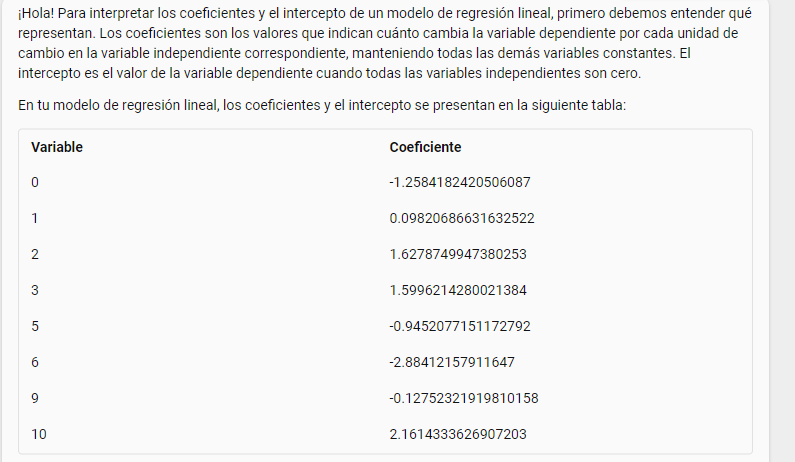

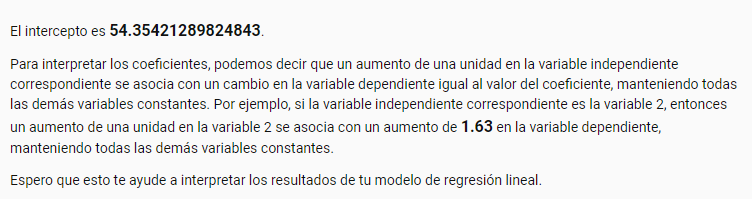

## REGRESSION TASK - PART B

### BASELINE

In [ ]:
# Función para calcular el modelo de referencia (baseline model)
def calculate_baseline(y_train, y_test):
    y_mean = np.mean(y_train)  # Calcular la media de y en los datos de entrenamiento
    y_pred = np.full_like(y_test, y_mean)  # Crear un arreglo de predicciones con la media
    mse = mean_squared_error(y_test, y_pred)  # Calcular el MSE
    return mse

def double_cross_validation_baseline(X, y, n_outer_splits=10, n_inner_splits=10):
    cv_outer = KFold(n_splits=n_outer_splits, shuffle=True, random_state=42)

    baseline_mses = []  # Lista para almacenar las MSE de los modelos de referencia (baseline)

    pointer = 1
    for train_index, test_index in cv_outer.split(X, y):
        print('\nOuter CV: {} of {} outer fold'.format(pointer, n_outer_splits))
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        inner_baseline_mses = []  # Lista para almacenar las MSE de los modelos de referencia (baseline)

        inner_pointer = 1

        for inner_train_index, inner_test_index in cv_outer.split(x_train, y_train):
            x_inner_train, x_inner_test = x_train.iloc[inner_train_index], x_train.iloc[inner_test_index]
            y_inner_train, y_inner_test = y_train.iloc[inner_train_index], y_train.iloc[inner_test_index]

            # Calcula el modelo de referencia (baseline)
            baseline_mse = calculate_baseline(y_inner_train, y_inner_test)
            inner_baseline_mses.append(baseline_mse)

            print("Outer CV: {}, Inner CV: {}, Baseline MSE: {:.3f}".format(pointer, inner_pointer, baseline_mse))
            inner_pointer += 1

        # Calcula el promedio de las MSE del modelo de referencia (baseline) para esta outer fold
        baseline_mean = np.mean(inner_baseline_mses)
        baseline_mses.append(baseline_mean)

        print("Outer CV: {}, Average Baseline MSE: {:.3f}".format(pointer, baseline_mean))
        pointer += 1

    return baseline_mses

# Ejecuta la doble validación cruzada para el modelo de referencia (baseline)
baseline_results = double_cross_validation_baseline(X_std, y)


Outer CV: 1 of 10 outer fold
Outer CV: 1, Inner CV: 1, Baseline MSE: 90.857
Outer CV: 1, Inner CV: 2, Baseline MSE: 106.074
Outer CV: 1, Inner CV: 3, Baseline MSE: 68.704
Outer CV: 1, Inner CV: 4, Baseline MSE: 99.074
Outer CV: 1, Inner CV: 5, Baseline MSE: 96.667
Outer CV: 1, Inner CV: 6, Baseline MSE: 63.444
Outer CV: 1, Inner CV: 7, Baseline MSE: 57.481
Outer CV: 1, Inner CV: 8, Baseline MSE: 80.111
Outer CV: 1, Inner CV: 9, Baseline MSE: 61.889
Outer CV: 1, Inner CV: 10, Baseline MSE: 95.556
Outer CV: 1, Average Baseline MSE: 81.986

Outer CV: 2 of 10 outer fold
Outer CV: 2, Inner CV: 1, Baseline MSE: 61.786
Outer CV: 2, Inner CV: 2, Baseline MSE: 95.519
Outer CV: 2, Inner CV: 3, Baseline MSE: 93.000
Outer CV: 2, Inner CV: 4, Baseline MSE: 88.630
Outer CV: 2, Inner CV: 5, Baseline MSE: 59.222
Outer CV: 2, Inner CV: 6, Baseline MSE: 97.630
Outer CV: 2, Inner CV: 7, Baseline MSE: 108.000
Outer CV: 2, Inner CV: 8, Baseline MSE: 85.222
Outer CV: 2, Inner CV: 9, Baseline MSE: 62.037
Ou

In [ ]:
baseline_df = pd.DataFrame({'Outer Fold': range(1, len(baseline_results) + 1), 'Baseline MSE': baseline_results})
baseline_df

,Outer Fold,Baseline MSE
0,1,81.985714
1,2,83.415608
2,3,80.461772
3,4,82.126455
4,5,80.366138
5,6,80.437698
6,7,78.727116
7,8,85.243122
8,9,84.561111
9,10,82.294841


### LASSO MODEL

In [ ]:
def double_cross_validation_lasso(X, y, alpha_values, n_outer_splits=10, n_inner_splits=10):
    cv_outer = KFold(n_splits=n_outer_splits, shuffle=True, random_state=42)
    cv_inner = KFold(n_splits=n_inner_splits, shuffle=True, random_state=42)

    outer_mses = []  # Lista para almacenar las MSE de las outer folds
    best_alphas = []  # Lista para almacenar los mejores valores de alpha para cada inner fold

    pointer = 1
    for train_index, test_index in cv_outer.split(X, y):
        print('\nOuter CV: {} of {} outer fold'.format(pointer, n_outer_splits))
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        inner_mses = []  # Lista para almacenar las MSE de las inner folds
        inner_alphas = []  # Lista para almacenar los mejores valores de alpha para cada inner fold

        inner_pointer = 1
        for inner_train_index, inner_test_index in cv_inner.split(x_train, y_train):
            x_inner_train, x_inner_test = x_train.iloc[inner_train_index], x_train.iloc[inner_test_index]
            y_inner_train, y_inner_test = y_train.iloc[inner_train_index], y_train.iloc[inner_test_index]

            inner_fold_mses = []
            for alpha in alpha_values:
                lasso_model = Lasso(alpha=alpha)
                lasso_model.fit(x_inner_train.fillna(-99), y_inner_train)
                pred_inner_test = lasso_model.predict(x_inner_test.fillna(-99))
                mse_inner = mean_squared_error(y_inner_test, pred_inner_test)
                inner_fold_mses.append(mse_inner)

            # Encuentra el mejor valor de alpha para esta inner fold
            best_alpha = alpha_values[np.argmin(inner_fold_mses)]

            # Guarda el mejor valor de alpha
            inner_alphas.append(best_alpha)

            # Ajusta un modelo Lasso con el mejor alpha
            lasso_model = Lasso(alpha=best_alpha)
            lasso_model.fit(x_inner_train.fillna(-99), y_inner_train)

            # Evalúa el modelo en esta inner fold
            pred_inner_test = lasso_model.predict(x_inner_test.fillna(-99))
            mse_inner = mean_squared_error(y_inner_test, pred_inner_test)
            inner_mses.append(mse_inner)

            print("Outer CV: {}, Inner CV: {}, Best Alpha: {:.3f}, Inner Fold MSE: {:.3f}".format(
                pointer, inner_pointer, best_alpha, mse_inner))
            inner_pointer += 1

        # Calcula el promedio de las MSE de las inner folds para esta outer fold
        outer_mse = np.mean(inner_mses)
        outer_mses.append(outer_mse)

        # Calcula el promedio de los mejores alphas para esta outer fold
        best_alpha_outer = np.mean(inner_alphas)
        best_alphas.append(best_alpha_outer)

        print("Outer CV: {}, Average Outer Fold MSE: {:.3f}, Average Best Alpha: {:.3f}".format(
            pointer, outer_mse, best_alpha_outer))
        pointer += 1

    return outer_mses, best_alphas

# Valores de alpha (lambda) para probar
alpha_values = lambda_values = np.arange(0, 5, 0.1)

# Ejecuta la doble validación cruzada para el modelo Lasso
lasso_results, lasso_best_alphas = double_cross_validation_lasso(X_std, y, alpha_values=alpha_values)

lasso_results_df = pd.DataFrame({
    'Outer Fold': range(1, len(lasso_results) + 1),
    'Lasso MSE': lasso_results,
    'Best Alpha': lasso_best_alphas
})


Outer CV: 1 of 10 outer fold
Outer CV: 1, Inner CV: 1, Best Alpha: 1.300, Inner Fold MSE: 80.101
Outer CV: 1, Inner CV: 2, Best Alpha: 0.000, Inner Fold MSE: 67.062
Outer CV: 1, Inner CV: 3, Best Alpha: 0.000, Inner Fold MSE: 43.410
Outer CV: 1, Inner CV: 4, Best Alpha: 0.100, Inner Fold MSE: 69.599
Outer CV: 1, Inner CV: 5, Best Alpha: 0.000, Inner Fold MSE: 69.778
Outer CV: 1, Inner CV: 6, Best Alpha: 1.300, Inner Fold MSE: 54.843
Outer CV: 1, Inner CV: 7, Best Alpha: 1.700, Inner Fold MSE: 47.939
Outer CV: 1, Inner CV: 8, Best Alpha: 0.200, Inner Fold MSE: 63.354
Outer CV: 1, Inner CV: 9, Best Alpha: 0.400, Inner Fold MSE: 35.859
Outer CV: 1, Inner CV: 10, Best Alpha: 0.600, Inner Fold MSE: 73.108
Outer CV: 1, Average Outer Fold MSE: 60.505, Average Best Alpha: 0.560

Outer CV: 2 of 10 outer fold
Outer CV: 2, Inner CV: 1, Best Alpha: 0.100, Inner Fold MSE: 34.071
Outer CV: 2, Inner CV: 2, Best Alpha: 0.100, Inner Fold MSE: 60.395
Outer CV: 2, Inner CV: 3, Best Alpha: 0.100, Inner F

In [ ]:
lasso_results_df

,Outer Fold,Lasso MSE,Best Alpha
0,1,60.505327,0.56
1,2,60.208982,0.47
2,3,59.442704,0.58
3,4,58.589927,0.40
4,5,59.156711,0.31
5,6,58.498060,0.39
6,7,56.921722,0.64
7,8,62.540515,0.34
8,9,60.083324,0.45
9,10,59.835629,0.37


el plot de abajo es para comparar cual de los dos da un mejor resultado, en este caso lo hace el modelo lasso

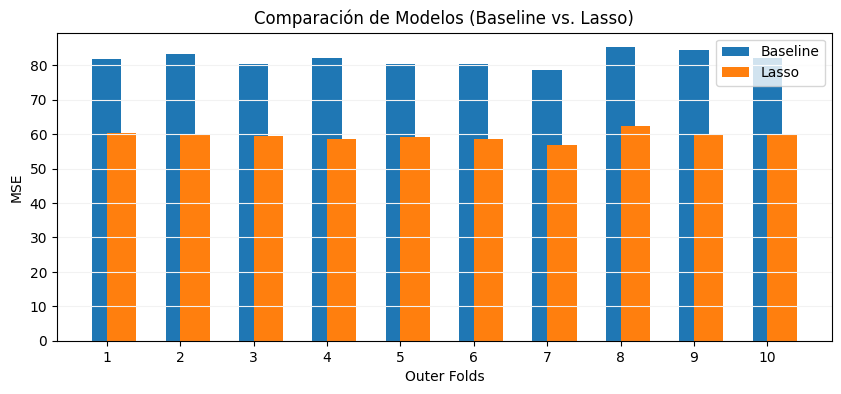

In [ ]:
# Define el número de outer folds
n_outer_folds = len(baseline_df)

# Extrae las métricas de rendimiento de los DataFrames
baseline_mses = baseline_df['Baseline MSE']
lasso_mses = lasso_results_df['Lasso MSE']

# Crea una lista de índices para los outer folds
outer_folds = list(range(1, n_outer_folds + 1))

# Crea un gráfico de barras para comparar los modelos
plt.figure(figsize=(10, 4))
plt.bar(outer_folds, baseline_mses, width=0.4, label='Baseline', align='center')
plt.bar(outer_folds, lasso_mses, width=0.4, label='Lasso', align='edge')

plt.xlabel('Outer Folds')
plt.ylabel('MSE')
plt.title('Comparación de Modelos (Baseline vs. Lasso)')
plt.xticks(outer_folds)
plt.legend()
plt.grid(axis='y', color='0.95')

plt.show()


### ANN

In [ ]:
def double_cross_validation_ann(X, y, hidden_units_range, n_outer_splits=10, n_inner_splits=10):
    cv_outer = KFold(n_splits=n_outer_splits, shuffle=True, random_state=42)
    cv_inner = KFold(n_splits=n_inner_splits, shuffle=True, random_state=42)

    outer_mses = []  # Lista para almacenar las MSE de las outer folds
    best_hidden_units = []  # Lista para almacenar las mejores unidades ocultas para cada inner fold

    pointer = 1
    for train_index, test_index in cv_outer.split(X, y):
        print('\nOuter CV: {} of {} outer fold'.format(pointer, n_outer_splits))
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        inner_mses = []  # Lista para almacenar las MSE de las inner folds
        inner_hidden_units = []  # Lista para almacenar las mejores unidades ocultas para cada inner fold

        inner_pointer = 1
        for inner_train_index, inner_test_index in cv_inner.split(x_train, y_train):
            x_inner_train, x_inner_test = x_train.iloc[inner_train_index], x_train.iloc[inner_test_index]
            y_inner_train, y_inner_test = y_train.iloc[inner_train_index], y_train.iloc[inner_test_index]

            inner_fold_mses = []
            inner_fold_units = []

            for units in hidden_units_range:
                ann_model = MLPRegressor(hidden_layer_sizes=(units,), max_iter=1000, random_state=42)
                ann_model.fit(x_inner_train.fillna(-99), y_inner_train)
                pred_inner_test = ann_model.predict(x_inner_test.fillna(-99))
                mse_inner = mean_squared_error(y_inner_test, pred_inner_test)
                inner_fold_mses.append(mse_inner)
                inner_fold_units.append(units)

            # Encuentra el mejor número de unidades ocultas para esta inner fold
            best_units = inner_fold_units[np.argmin(inner_fold_mses)]

            # Guarda el mejor número de unidades ocultas
            inner_hidden_units.append(best_units)

            # Ajusta un modelo ANN con el mejor número de unidades ocultas
            ann_model = MLPRegressor(hidden_layer_sizes=(best_units,), max_iter=1000, random_state=42)
            ann_model.fit(x_inner_train.fillna(-99), y_inner_train)

            # Evalúa el modelo en esta inner fold
            pred_inner_test = ann_model.predict(x_inner_test.fillna(-99))
            mse_inner = mean_squared_error(y_inner_test, pred_inner_test)
            inner_mses.append(mse_inner)

            print("Outer CV: {}, Inner CV: {}, Best Hidden Units: {}, Inner Fold MSE: {:.3f}".format(
                pointer, inner_pointer, best_units, mse_inner))
            inner_pointer += 1

        # Calcula el promedio de las MSE de las inner folds para esta outer fold
        outer_mse = np.mean(inner_mses)
        outer_mses.append(outer_mse)

        # Calcula el promedio de los mejores números de unidades ocultas para esta outer fold
        best_units_outer = np.mean(inner_hidden_units)
        best_hidden_units.append(best_units_outer)

        print("Outer CV: {}, Average Outer Fold MSE: {:.3f}, Average Best Hidden Units: {:.3f}".format(
            pointer, outer_mse, best_units_outer))
        pointer += 1

    return outer_mses, best_hidden_units

# Rango de números de unidades ocultas para probar
hidden_units_range = [1, 2, 3,4,5]

# Ejecuta la doble validación cruzada para la ANN
ann_results, ann_best_units = double_cross_validation_ann(X_std, y, hidden_units_range=hidden_units_range)

# Crear un DataFrame con los resultados
ann_results_df = pd.DataFrame({
    'ANN MSE': ann_results,
    'Best Hidden Units': ann_best_units
})

ann_results_df


Outer CV: 1 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 413.274


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 2, Best Hidden Units: 3, Inner Fold MSE: 573.165


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 714.763


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 685.532


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 412.713


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 6, Best Hidden Units: 3, Inner Fold MSE: 566.523


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 849.330


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 558.331


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 623.113


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 1, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 540.510
Outer CV: 1, Average Outer Fold MSE: 593.725, Average Best Hidden Units: 4.600

Outer CV: 2 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 514.707


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 668.596


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 3, Best Hidden Units: 3, Inner Fold MSE: 438.251


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 412.411


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 633.083


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 6, Best Hidden Units: 3, Inner Fold MSE: 780.124


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 767.620


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 587.344


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 399.648


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 2, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 695.686
Outer CV: 2, Average Outer Fold MSE: 589.747, Average Best Hidden Units: 4.600

Outer CV: 3 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 515.029


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 599.687


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 643.383


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 482.646


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 570.378


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 6, Best Hidden Units: 3, Inner Fold MSE: 717.474


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 817.423


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 469.932


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 521.803


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 3, Inner CV: 10, Best Hidden Units: 3, Inner Fold MSE: 473.334
Outer CV: 3, Average Outer Fold MSE: 581.109, Average Best Hidden Units: 4.600

Outer CV: 4 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 526.695


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 754.842


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 579.080


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 561.217


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 5, Best Hidden Units: 3, Inner Fold MSE: 525.996


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 6, Best Hidden Units: 5, Inner Fold MSE: 838.675


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 545.323


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 581.304


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 670.928


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 4, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 393.476
Outer CV: 4, Average Outer Fold MSE: 597.754, Average Best Hidden Units: 4.800

Outer CV: 5 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 578.364


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 511.800


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 624.084


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 538.097


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 650.063


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 6, Best Hidden Units: 5, Inner Fold MSE: 412.708


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 533.451


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 564.959


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 589.868


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 5, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 573.153
Outer CV: 5, Average Outer Fold MSE: 557.655, Average Best Hidden Units: 5.000

Outer CV: 6 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 798.339


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 637.099


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 548.308


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 484.215


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 407.138


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 6, Best Hidden Units: 5, Inner Fold MSE: 664.003


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 847.371


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 487.628


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 590.892


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 6, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 521.195
Outer CV: 6, Average Outer Fold MSE: 598.619, Average Best Hidden Units: 5.000

Outer CV: 7 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 551.943


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 2, Best Hidden Units: 3, Inner Fold MSE: 528.408


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 568.590


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 4, Best Hidden Units: 3, Inner Fold MSE: 799.185


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 638.201


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 6, Best Hidden Units: 5, Inner Fold MSE: 466.378


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 429.009


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 432.462


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 771.223


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 7, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 416.655
Outer CV: 7, Average Outer Fold MSE: 560.205, Average Best Hidden Units: 4.600

Outer CV: 8 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 634.172


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 561.301


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 3, Best Hidden Units: 3, Inner Fold MSE: 485.894


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 490.378


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 784.262


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 6, Best Hidden Units: 3, Inner Fold MSE: 689.077


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 691.394


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 629.316


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 574.053


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 8, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 385.754
Outer CV: 8, Average Outer Fold MSE: 592.560, Average Best Hidden Units: 4.600

Outer CV: 9 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 772.642


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 2, Best Hidden Units: 5, Inner Fold MSE: 667.349


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 3, Best Hidden Units: 5, Inner Fold MSE: 469.529


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 466.131


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 494.966


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 6, Best Hidden Units: 5, Inner Fold MSE: 587.954


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 609.227


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 350.587


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 540.654


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 9, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 666.639
Outer CV: 9, Average Outer Fold MSE: 562.568, Average Best Hidden Units: 5.000

Outer CV: 10 of 10 outer fold


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 1, Best Hidden Units: 5, Inner Fold MSE: 538.376


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 2, Best Hidden Units: 3, Inner Fold MSE: 617.817


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 3, Best Hidden Units: 3, Inner Fold MSE: 435.819


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 4, Best Hidden Units: 5, Inner Fold MSE: 605.494


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 5, Best Hidden Units: 5, Inner Fold MSE: 686.013


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 6, Best Hidden Units: 3, Inner Fold MSE: 516.507


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 7, Best Hidden Units: 5, Inner Fold MSE: 629.251


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 8, Best Hidden Units: 5, Inner Fold MSE: 410.309


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 9, Best Hidden Units: 5, Inner Fold MSE: 755.971


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Outer CV: 10, Inner CV: 10, Best Hidden Units: 5, Inner Fold MSE: 522.315
Outer CV: 10, Average Outer Fold MSE: 571.787, Average Best Hidden Units: 4.400


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,ANN MSE,Best Hidden Units
0,593.725484,4.6
1,589.747006,4.6
2,581.108915,4.6
3,597.753829,4.8
4,557.654699,5.0
5,598.618873,5.0
6,560.205345,4.6
7,592.560080,4.6
8,562.567723,5.0
9,571.787237,4.4


In [ ]:
ann_results_df

,ANN MSE,Best Hidden Units
0,593.725484,4.6
1,589.747006,4.6
2,581.108915,4.6
3,597.753829,4.8
4,557.654699,5.0
5,598.618873,5.0
6,560.205345,4.6
7,592.560080,4.6
8,562.567723,5.0
9,571.787237,4.4


In [ ]:
for i, (mse, units) in enumerate(zip(ann_results, ann_best_units)):
    print("Outer Fold {}: ANN MSE: {:.3f}, Best Hidden Units: {:.1f}".format(i + 1, mse, units))

Outer Fold 1: ANN MSE: 593.725, Best Hidden Units: 4.6
Outer Fold 2: ANN MSE: 589.747, Best Hidden Units: 4.6
Outer Fold 3: ANN MSE: 581.109, Best Hidden Units: 4.6
Outer Fold 4: ANN MSE: 597.754, Best Hidden Units: 4.8
Outer Fold 5: ANN MSE: 557.655, Best Hidden Units: 5.0
Outer Fold 6: ANN MSE: 598.619, Best Hidden Units: 5.0
Outer Fold 7: ANN MSE: 560.205, Best Hidden Units: 4.6
Outer Fold 8: ANN MSE: 592.560, Best Hidden Units: 4.6
Outer Fold 9: ANN MSE: 562.568, Best Hidden Units: 5.0
Outer Fold 10: ANN MSE: 571.787, Best Hidden Units: 4.4


### Ann otra vez (intento de mejores resultados)

#### Imports + toolbox

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import os



In [ ]:
class BinClassifierEnsemble:
    '''
        Simple class to aggregate multiple weak classfiers into ensemble
    '''
    classifiers = []
    alpha = 0
    cn = 0

    def __init__(self, classifier_list, alpha='auto'):
        self.classifiers = classifier_list
        self.cn = len(self.classifiers)
        if type(alpha) is str and alpha=='auto':
            self.alpha = np.ones((self.cn,1),dtype=float)/self.cn
        else:
            self.alpha = np.asarray(alpha).ravel()


    def predict(self, X):
        '''
            Returns predicted class (value of y) for given X,
            based on ensemble majority vote.
        '''
        votes = np.zeros((X.shape[0],1))
        for c_id, c in enumerate(self.classifiers):
            y_est = np.mat(c.predict(X)).T
            y_est[y_est>1]=1 # restrict to binomial (or first-vs-rest)
            votes = votes + y_est*self.alpha[c_id]
        return (votes.astype(float)>.5).astype(int)

    def predict_proba(self, X):
        '''
            Returns proportion of ensemble votes for class being y=1,
            for given X, that is: votes1/(votes0+votes1).
        '''
        votes = np.ones((X.shape[0],1))
        for c_id, c in enumerate(self.classifiers):
            y_est = np.mat(c.predict(X)).T
            y_est[y_est>1]=1 # restrict to binomial (or first-vs-rest)
            votes = votes - y_est*self.alpha[c_id]
        return votes.astype(float)


In [ ]:
def categoric2numeric(x):
    '''
    CATEGORIC2NUMERIC converts data matrix with categorical columns given by
    numeric or text values to numeric columns using one out of K coding.

    Usage:
        X_num, attribute_names = categoric2numeric(x)

    Input:
        x                   categorical column of a data matrix

    Output:
        X_num               Data matrix where categoric column has been
                            converted to one out of K coding
        attribute_names     list of string type with attribute names '''

    x = np.asarray(x).ravel()
    x_labels = np.unique(x)
    x_labels_str = x_labels.astype(str).tolist()
    N = len(x)
    M = len(x_labels)
    xc = np.zeros((N,M), dtype=int)
    for i in range(M):
        flags = x==x_labels[i]
        xc[flags,i] = 1
    return xc, x_labels_str




In [ ]:
from scipy.stats import zscore


def similarity(X, Y, method):
    '''
    SIMILARITY Computes similarity matrices

    Usage:
        sim = similarity(X, Y, method)

    Input:
    X   N1 x M matrix
    Y   N2 x M matrix
    method   string defining one of the following similarity measure
           'SMC', 'smc'             : Simple Matching Coefficient
           'Jaccard', 'jac'         : Jaccard coefficient
           'ExtendedJaccard', 'ext' : The Extended Jaccard coefficient
           'Cosine', 'cos'          : Cosine Similarity
           'Correlation', 'cor'     : Correlation coefficient

    Output:
    sim Estimated similarity matrix between X and Y
        If input is not binary, SMC and Jaccard will make each
        attribute binary according to x>median(x)

    Copyright, Morten Morup and Mikkel N. Schmidt
    Technical University of Denmark '''

    X = np.mat(X)
    Y = np.mat(Y)
    N1, M = np.shape(X)
    N2, M = np.shape(Y)

    method = method[:3].lower()
    if method=='smc': # SMC
        # Check if input variable is already binary, and binarize if not
        for input_var in [X, Y]:
            if not np.all(np.in1d(input_var, [0,1])):
                input_var = binarize(input_var)
        sim = ((X*Y.T)+((1-X)*(1-Y).T))/M
    elif method=='jac': # Jaccard
        # Check if input variable is already binary, and binarize if not
        for input_var in [X, Y]:
            if not np.all(np.in1d(input_var, [0,1])):
                input_var = binarize(input_var)
        sim = (X*Y.T)/(M-(1-X)*(1-Y).T)
    elif method=='ext': # Extended Jaccard
        XYt = X*Y.T
        sim = XYt / (np.log( np.exp(sum(np.power(X.T,2))).T * np.exp(sum(np.power(Y.T,2))) ) - XYt)
    elif method=='cos': # Cosine
        sim = (X*Y.T)/(np.sqrt(sum(np.power(X.T,2))).T * np.sqrt(sum(np.power(Y.T,2))))
    elif method=='cor': # Correlation
        X_ = zscore(np.asarray(X),axis=1,ddof=1) # Matrix type throws error
        Y_ = zscore(np.asarray(Y),axis=1,ddof=1)
        sim = (X_@Y_.T)/(M-1)
    return sim

def binarize(X,Y=None):
    ''' Force binary representation of the matrix, according to X>median(X) '''
    x_was_transposed = False
    if Y is None:
        if X.shape[0] == 1:
            x_was_transposed = True
            X = X.T;

        Xmedians = np.ones((np.shape(X)[0],1)) * np.median(X,0)
        Xflags = X>Xmedians
        X[Xflags] = 1; X[~Xflags] = 0

        if x_was_transposed:
            return X.T
        return X
    else:
        #X = np.matrix(X); Y = np.matrix(Y);
        #XYmedian= np.median(np.bmat('X; Y'),0)
        #Xmedians = np.ones((np.shape(X)[0],1)) * XYmedian
        #Xflags = X>Xmedians
        #X[Xflags] = 1; X[~Xflags] = 0
        #Ymedians = np.ones((np.shape(Y)[0],1)) * XYmedian
        #Yflags = Y>Ymedians
        #Y[Yflags] = 1; Y[~Yflags] = 0
        return [binarize(X,None),binarize(Y,None)]


## Example
#import numpy as np
#from similarity import binarize2
#A = np.asarray([[1,2,3,4,5],[6,7,8,9,10],[1,2,3,4,5],[6,7,8,9,10]]).T
#binarize2(A,['a','b','c','d'])
def binarize2(X,columnnames):
    X = np.concatenate((binarize(X),1-binarize(X)),axis=1)

    new_column_names = []
    [new_column_names.append(elm) for elm in [name+' 50th-100th percentile' for name in columnnames]]
    [new_column_names.append(elm) for elm in [name+' 0th-50th percentile' for name in columnnames]]

    return X, new_column_names

In [ ]:
import scipy.stats
import scipy.stats as st

def correlated_ttest(r, rho, alpha=0.05):
    rhat = np.mean(r)
    shat = np.std(r)
    J = len(r)
    sigmatilde = shat * np.sqrt(1 / J + rho / (1 - rho))

    CI = st.t.interval(1 - alpha, df=J - 1, loc=rhat, scale=sigmatilde)  # Confidence interval
    p = 2*st.t.cdf(-np.abs(rhat) / sigmatilde, df=J - 1)  # p-value
    return p, CI


def jeffrey_interval(y, yhat, alpha=0.05):
    m = sum(y - yhat == 0)
    n = y.size
    a = m+.5
    b = n-m + .5
    CI = scipy.stats.beta.interval(1-alpha, a=a, b=b)
    thetahat = a/(a+b)
    return thetahat, CI

def ttest_onemodel(y_true, yhat, loss_norm_p=1, alpha=0.05):
    # perform statistical comparison of the models
    # compute z with squared error.

    zA = np.abs(y_true - yhat) ** loss_norm_p
    CI = st.t.interval(1 - alpha, df=len(zA) - 1, loc=np.mean(zA), scale=st.sem(zA))
    return np.mean(zA), CI

def ttest_twomodels(y_true, yhatA, yhatB, alpha=0.05, loss_norm_p=1):
    zA = np.abs(y_true - yhatA) ** loss_norm_p
    # Compute confidence interval of z = zA-zB and p-value of Null hypothesis
    zB = np.abs(y_true - yhatB) ** loss_norm_p

    z = zA - zB
    CI = st.t.interval(1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)  # p-value
    return np.mean(z), CI, p


def mcnemar(y_true, yhatA, yhatB, alpha=0.05):
    # perform McNemars test
    nn = np.zeros((2,2))
    c1 = yhatA - y_true == 0
    c2 = yhatB - y_true == 0

    nn[0,0] = sum(c1 & c2)
    nn[0,1] = sum(c1 & ~c2)
    nn[1,0] = sum(~c1 & c2)
    nn[1,1] = sum(~c1 & ~c2)

    n = sum(nn.flat);
    n12 = nn[0,1]
    n21 = nn[1,0]

    thetahat = (n12-n21)/n
    Etheta = thetahat

    Q = n**2 * (n+1) * (Etheta+1) * (1-Etheta) / ( (n*(n12+n21) - (n12-n21)**2) )

    p = (Etheta + 1)*0.5 * (Q-1)
    q = (1-Etheta)*0.5 * (Q-1)

    CI = tuple(lm * 2 - 1 for lm in scipy.stats.beta.interval(1-alpha, a=p, b=q) )

    p = 2*scipy.stats.binom.cdf(min([n12,n21]), n=n12+n21, p=0.5)
    print("Result of McNemars test using alpha=", alpha)
    print("Comparison matrix n")
    print(nn)
    if n12+n21 <= 10:
        print("Warning, n12+n21 is low: n12+n21=",(n12+n21))

    print("Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = ", CI)
    print("p-value for two-sided test A and B have same accuracy (exact binomial test): p=", p)

    return thetahat, CI, p


if __name__ == "__main__":
    z = [-9.94147773e+02, 1.26057137e+02, 2.43068571e+03, 1.34943873e+02, -7.32103331e+02, 2.37564709e+02,
           2.50241916e+02, 2.57480953e+02, -2.63697057e+02, -6.87957076e+01, -2.79913347e+02, 1.88978039e+02,
           1.98121892e+02, 5.41920321e+01, 1.70814489e+02, 9.50546024e+02, -1.42327811e+02, 1.76465996e+02,
           6.87389306e+01, 1.73725613e+03, -1.78676140e+02, 1.52421405e+03, -5.30574002e+01, 1.95582309e+00,
           -1.94314010e+02, -6.72125537e+02, 1.62167916e+02, 1.78461753e+02, -1.24817459e+02, 1.43904422e+02,
           2.45598432e+02, 4.17515769e+02, 1.34710476e+02, -4.48734895e+01, 1.05674612e+02, -3.39105804e+02,
           -5.34365506e+02, 2.23486078e+02, 1.97750315e+02, -3.00557776e+03, 9.63587836e+01, -1.85012667e+02,
           2.54862222e+02, -1.78881284e+02, -1.03805766e+02, 2.52354768e+02, -6.00848307e+02, 3.71357436e+00,
           2.38950633e+02, -1.88401811e+03, 1.86325333e+02, 2.45168149e+02, 1.14115851e+01, 1.18459847e+02,
           4.20244456e+02, -1.96854780e+02, -1.24603029e+01, -5.54211898e+02, -1.57707245e+01, -5.39761905e+02,
           -2.82533665e+02, 1.42265335e+02, 1.30362591e+02, 3.63309122e+01, 1.38202398e+02, 1.58929137e+02,
           1.58929177e+02, 7.10797177e+02, 1.34089160e+01, 9.32132688e+02, 3.46853860e+01, 6.27785220e+01,
           2.81806999e-02, -1.52944174e+02, 2.66329889e+02, 1.62190118e+02, -3.89048944e-03, -2.60694426e+02,
           -7.15940302e+02, 2.25831089e+02, -1.77851578e+01, 2.66329889e+02, 1.08980992e+03, 1.56404585e+02,
           2.66329889e+02, 6.63044600e+02, 8.08266552e+01, 1.83926579e+02, 1.77769644e+02, -5.92678110e+01,
           1.86044032e+02, 1.59819830e+02, 2.60035987e+02, 1.60910872e+02, -2.39925571e+02, -1.03542616e+02,
           -1.30351275e+01, 3.88166963e+03, 1.51075198e+02, -1.65484521e+02, 9.08165687e+01, 1.18686751e+03,
           1.65290154e+02, -1.91692974e+02, 2.75584781e+02, -1.91227724e+03, -9.14883857e+00, -6.03404163e+01,
           1.26539212e+02, 5.32728542e+01, 7.13462504e+02, 2.24593771e+02, 1.16993301e+02, 1.08405310e+02,
           5.76378276e+01, 1.27516156e+02, 1.93353908e+01, 2.75555832e+02, -8.77754648e+01, -3.75658826e+02,
           -7.52816578e+02, -4.34021742e+02, 5.95930150e+01, 9.43829397e+02, -4.37258761e+02, 1.27857209e+02,
           4.36410358e+01, -9.96612122e+01, 2.24738210e+03, 1.60453092e+02, 2.03273360e+02, -8.06696669e+01,
           9.88763264e+01, 5.55727999e+02, -2.18588047e+02, 1.91855517e+02, 1.26188907e+03, -6.70477718e+02,
           -3.28242036e+02, 4.25807472e+01, 2.87933046e+03, 1.28770056e+03, 1.77890518e+02, 9.42159762e+02,
           1.97441517e+02, 6.71145887e+01, 1.97441517e+02, 1.38789855e+02, 2.30957514e+02, -1.18130059e+02,
           -1.09434948e+02, -3.46961432e+02, 1.25455407e+02, -1.97299428e+03, 1.77283165e+02, -3.36631354e+02,
           -2.60743339e+01, -2.24421069e+02, 1.95480316e+02, 3.54171629e+02, 1.65461586e+02, 1.05668384e+02,
           1.67418017e+01, -8.44526008e+02, 2.58552624e+02, 2.56605849e+02, 1.91315916e+02]

    alpha = 0.05
    CI = st.t.interval(1 - alpha, len(z) - 1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf(-np.abs(np.mean(z)) / st.sem(z), df=len(z) - 1)  # p-value

    print(p)
    print(CI)
    a = 123


0.06058841401088931
(-4.5527455166797495, 206.92980564710442)


In [ ]:
"""
INIT.PY
"""
import sklearn.metrics.cluster as cluster_metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model
from matplotlib.pyplot import contourf
from matplotlib import cm

def remove_zero_cols(m):
    '''Function removes from given matrix m the column vectors containing only zeros.'''
    rows = range(m.shape[0])
    cols = np.nonzero(sum(abs(m)))[1].tolist()[0]
    return m[np.ix_(rows,cols)]

def remove_zero_rows(m):
    '''Function removes from given matrix m the row vectors containing only zeros.'''
    rows = np.nonzero(sum(abs(m.T)).T)[0].tolist()[0]
    cols = range(m.shape[1])
    return m[np.ix_(rows,cols)]

def remove_zero_rows_and_cols(m):
    '''Function removes from given matrix m the row vectors and the column vectors containing only zeros.'''
    rows = np.nonzero(sum(abs(m.T)).T)[0].tolist()[0]
    cols = np.nonzero(sum(abs(m)))[1].tolist()[0]
    return m[np.ix_(rows,cols)]


def bmplot(yt, xt, X):
    ''' Function plots matrix X as image with lines separating fields. '''
    plt.imshow(X,interpolation='none',cmap='bone')
    plt.xticks(range(0,len(xt)), xt)
    plt.yticks(range(0,len(yt)), yt)
    for i in range(0,len(yt)):
        plt.axhline(i-0.5, color='black')
    for i in range(0,len(xt)):
        plt.axvline(i-0.5, color='black')


def glm_validate(X,y,cvf=10):
    ''' Validate linear regression model using 'cvf'-fold cross validation.
        The loss function computed as mean squared error on validation set (MSE).
        Function returns MSE averaged over 'cvf' folds.

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds
    '''
    y = y.squeeze()
    CV = model_selection.KFold(n_splits=cvf, shuffle=True)
    validation_error=np.empty(cvf)
    f=0
    for train_index, test_index in CV.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        m = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)
        validation_error[f] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
        f=f+1
    return validation_error.mean()


def feature_selector_lr(X,y,cvf=10,features_record=None,loss_record=None,display=''):
    ''' Function performs feature selection for linear regression model using
        'cvf'-fold cross validation. The process starts with empty set of
        features, and in every recurrent step one feature is added to the set
        (the feature that minimized loss function in cross-validation.)

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds

        Returns:
        selected_features   indices of optimal set of features
        features_record     boolean matrix where columns correspond to features
                            selected in subsequent steps
        loss_record         vector with cv errors in subsequent steps

        Example:
        selected_features, features_record, loss_record = ...
            feature_selector_lr(X_train, y_train, cvf=10)

    '''
    y = y.squeeze() #ÆNDRING JLH #9/3
    # first iteration error corresponds to no-feature estimator
    if loss_record is None:
        loss_record = np.array([np.square(y-y.mean()).sum()/y.shape[0]])
    if features_record is None:
        features_record = np.zeros((X.shape[1],1))

    # Add one feature at a time to find the most significant one.
    # Include only features not added before.
    selected_features = features_record[:,-1].nonzero()[0]
    min_loss = loss_record[-1]
    if display == 'verbose':
        print(min_loss)
    best_feature = False
    for feature in range(0,X.shape[1]):
        if np.where(selected_features==feature)[0].size==0:
            trial_selected = np.concatenate((selected_features,np.array([feature])),0).astype(int)
            # validate selected features with linear regression and cross-validation:
            trial_loss = glm_validate(X[:,trial_selected],y,cvf)
            if display is 'verbose':
                print(trial_loss)
            if trial_loss<min_loss:
                min_loss = trial_loss
                best_feature = feature

    # If adding extra feature decreased the loss function, update records
    # and go to the next recursive step
    if best_feature is not False:
        features_record = np.concatenate((features_record, np.array([features_record[:,-1]]).T), 1)
        features_record[best_feature,-1]=1
        loss_record = np.concatenate((loss_record,np.array([min_loss])),0)
        selected_features, features_record, loss_record = feature_selector_lr(X,y,cvf,features_record,loss_record)

    # Return current records and terminate procedure
    return selected_features, features_record, loss_record


def rlr_validate(X,y,lambdas,cvf=10):
    ''' Validate regularized linear regression model using 'cvf'-fold cross validation.
        Find the optimal lambda (minimizing validation error) from 'lambdas' list.
        The loss function computed as mean squared error on validation set (MSE).
        Function returns: MSE averaged over 'cvf' folds, optimal value of lambda,
        average weight values for all lambdas, MSE train&validation errors for all lambdas.
        The cross validation splits are standardized based on the mean and standard
        deviation of the training set when estimating the regularization strength.

        Parameters:
        X       training data set
        y       vector of values
        lambdas vector of lambda values to be validated
        cvf     number of crossvalidation folds

        Returns:
        opt_val_err         validation error for optimum lambda
        opt_lambda          value of optimal lambda
        mean_w_vs_lambda    weights as function of lambda (matrix)
        train_err_vs_lambda train error as function of lambda (vector)
        test_err_vs_lambda  test error as function of lambda (vector)
    '''
    CV = model_selection.KFold(cvf, shuffle=True)
    M = X.shape[1]
    w = np.empty((M,cvf,len(lambdas)))
    train_error = np.empty((cvf,len(lambdas)))
    test_error = np.empty((cvf,len(lambdas)))
    f = 0
    y = y.squeeze()
    for train_index, test_index in CV.split(X,y):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        # Standardize the training and set set based on training set moments
        mu = np.mean(X_train[:, 1:], 0)
        sigma = np.std(X_train[:, 1:], 0)

        X_train[:, 1:] = (X_train[:, 1:] - mu) / sigma
        X_test[:, 1:] = (X_test[:, 1:] - mu) / sigma

        # precompute terms
        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train
        for l in range(0,len(lambdas)):
            # Compute parameters for current value of lambda and current CV fold
            # note: "linalg.lstsq(a,b)" is substitue for Matlab's left division operator "\"
            lambdaI = lambdas[l] * np.eye(M)
            lambdaI[0,0] = 0 # remove bias regularization
            w[:,f,l] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
            # Evaluate training and test performance
            train_error[f,l] = np.power(y_train-X_train @ w[:,f,l].T,2).mean(axis=0)
            test_error[f,l] = np.power(y_test-X_test @ w[:,f,l].T,2).mean(axis=0)

        f=f+1

    opt_val_err = np.min(np.mean(test_error,axis=0))
    opt_lambda = lambdas[np.argmin(np.mean(test_error,axis=0))]
    train_err_vs_lambda = np.mean(train_error,axis=0)
    test_err_vs_lambda = np.mean(test_error,axis=0)
    mean_w_vs_lambda = np.squeeze(np.mean(w,axis=1))

    return opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda

def dbplotf(X,y,fun,grid_range,resolution=100.0) :
    # smoothness of color-coding:
    levels = 100
    # convert from one-out-of-k encoding, if neccessary:
    if np.ndim(y)>1: y = np.argmax(y,1)
    # compute grid range if not given explicitly:
    if grid_range=='auto':
        grid_range = [X.min(axis=0)[0], X.max(axis=0)[0], X.min(axis=0)[1], X.max(axis=0)[1]]

    delta_f1 = float(grid_range[1]-grid_range[0])/float(resolution)
    delta_f2 = float(grid_range[3]-grid_range[2])/float(resolution)
    f1 = np.arange(grid_range[0],grid_range[1],delta_f1)
    f2 = np.arange(grid_range[2],grid_range[3],delta_f2)
    F1, F2 = np.meshgrid(f1, f2)
    C = len(np.unique(y).tolist())
    # adjust color coding:
    if C==2: C_colors = ['b', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)']; C_levels = [.5]
    if C==3: C_colors = ['b', 'g', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)', 'Class C (y=2)']; C_levels = [.66, 1.34]
    if C==4: C_colors = ['b', 'w', 'y', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)', 'Class C (y=2)', 'Class D (y=3)']; C_levels = [.74, 1.5, 2.26]
    if C>4:
        # One way to get class colors for more than 4 classes. Note this may result in illegible figures!
        C_colors=[]
        C_legend=[]
        for c in range(C):
            C_colors.append(plt.cm.jet.__call__(c*255/(C-1))[:3])
            C_legend.append('Class {0}'.format(c))
        C_levels = [.74, 1.5, 2.26]

    coords = np.mat( [[f1[i], f2[j]] for i in range(len(f1)) for j in range(len(f2))] )
    values_list = fun(coords)#np.mat(classifier.predict(coords))
    if np.ndim(values_list)>1: raise ValueError('Expected vector got something else')
    if len(set(values_list))==1: raise ValueError('Expect multiple predicted value, but all predictions are equal. Try a more complex model')


    if values_list.shape[0]!=len(f1)*len(f2): values_list = values_list.T


    values = np.asarray(np.reshape(values_list,(len(f1),len(f2))).T)

    #hold(True)
    for c in range(C):
        cmask = (y==c); plt.plot(X[cmask,0], X[cmask,1], '.', color=C_colors[c], markersize=10)
    plt.title('Model prediction and decision boundary')
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2');
    plt.contour(F1, F2, values, levels=C_levels, colors=['k'], linestyles='dashed')
    plt.contourf(F1, F2, values, levels=np.linspace(values.min(),values.max(),levels), cmap=plt.cm.jet, origin='image')
    plt.colorbar(format='%.1f'); plt.legend(C_legend)
    #hold(False)

def dbplot(classifier, X, y, grid_range, resolution=100):
    ''' Plot decision boundry for given binomial or multinomial classifier '''

    # smoothness of color-coding:
    levels = 100
    # convert from one-out-of-k encoding, if neccessary:
    if np.ndim(y)>1: y = np.argmax(y,1)
    # compute grid range if not given explicitly:
    if grid_range=='auto':
        grid_range = [X.min(0)[0], X.max(0)[0], X.min(0)[1], X.max(0)[1]]

    delta_f1 = float(grid_range[1]-grid_range[0])/resolution
    delta_f2 = float(grid_range[3]-grid_range[2])/resolution
    f1 = np.arange(grid_range[0],grid_range[1],delta_f1)
    f2 = np.arange(grid_range[2],grid_range[3],delta_f2)
    F1, F2 = np.meshgrid(f1, f2)
    C = len(np.unique(y).tolist())
    # adjust color coding:
    if C==2: C_colors = ['b', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)']; C_levels = [.5]
    if C==3: C_colors = ['b', 'g', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)', 'Class C (y=2)']; C_levels = [.66, 1.34]
    if C==4: C_colors = ['b', 'w', 'y', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)', 'Class C (y=2)', 'Class D (y=3)']; C_levels = [.74, 1.5, 2.26]
    if C>4:
        # One way to get class colors for more than 4 classes. Note this may result in illegible figures!
        C_colors=[]
        C_legend=[]
        for c in range(C):
            C_colors.append(plt.cm.jet.__call__(c*255/(C-1))[:3])
            C_legend.append('Class {0}'.format(c))
        C_levels = [.74, 1.5, 2.26]

    coords = np.array( [[f1[i], f2[j]] for i in range(len(f1)) for j in range(len(f2))] )
    values_list = classifier.predict(coords)
    if values_list.shape[0]!=len(f1)*len(f2): values_list = values_list.T
    values = np.reshape(values_list,(len(f1),len(f2))).T

    #hold(True)
    for c in range(C):
        cmask = (y==c); plt.plot(X[cmask,0], X[cmask,1], '.', color=C_colors[c], markersize=10)
    plt.title('Model prediction and decision boundary')
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2');
    plt.contour(F1, F2, values, levels=C_levels, colors=['k'], linestyles='dashed')
    plt.contourf(F1, F2, values, levels=np.linspace(values.min(),values.max(),levels), cmap=plt.cm.jet, origin='image')
    plt.colorbar(format='%.1f'); plt.legend(C_legend)
    #hold(False)


def dbprobplot(classifier, X, y, grid_range, resolution=100):
    ''' Plot decision boundry for given binomial classifier '''

    # smoothness of color-coding:
    levels = 100
    # convert from one-out-of-k encoding, if neccessary:
    if np.ndim(y)>1: y = np.argmax(y,1)
    # compute grid range if not given explicitly:
    if grid_range=='auto':
        grid_range = [X.min(0)[0], X.max(0)[0], X.min(0)[1], X.max(0)[1]]
    # if more than two classes, display the first class against the rest:
    y[y>1]=1
    C=2; C_colors = ['b', 'r']; C_legend = ['Class A (y=0)', 'Class B (y=1)']; C_levels = [.5]

    delta_f1 = float(grid_range[1]-grid_range[0])/resolution
    delta_f2 = float(grid_range[3]-grid_range[2])/resolution
    f1 = np.arange(grid_range[0],grid_range[1],delta_f1)
    f2 = np.arange(grid_range[2],grid_range[3],delta_f2)
    F1, F2 = np.meshgrid(f1, f2)

    coords = np.array([[f1[i], f2[j]] for i in range(len(f1)) for j in range(len(f2))])
    values_list = classifier.predict_proba(coords)
    if values_list.shape[0]!=len(f1)*len(f2): values_list = values_list.T
    values_list = 1-values_list[:,0] # probability of class being y=1
    values = np.reshape(values_list,(len(f1),len(f2))).T

    #hold(True)
    for c in range(C):
        cmask = (y==c); plt.plot(X[cmask,0], X[cmask,1], '.', color=C_colors[c], markersize=10)
    plt.title('Model prediction and decision boundary')
    plt.xlabel('Feature 1'); plt.ylabel('Feature 2');

    plt.contour(F1, F2, values, levels=C_levels, colors=['k'], linestyles='dashed')
    contourf(F1, F2, values, levels=np.linspace(values.min(),values.max(),levels), cmap=cm.jet, origin='image')
    plt.colorbar(format='%.1f'); plt.legend(C_legend)
    #hold(False)

from sklearn import metrics

def rocplot(p, y):
    '''
    function: AUC, TPR, FPR = rocplot(p, y)
    ROCPLOT Plots the receiver operating characteristic (ROC) curve and
    calculates the area under the curve (AUC).

    Notice that the function assumes values of p are all distinct.


    Usage:
        rocplot(p, y)
        AUC, TPR, FDR = rocplot(p, y)

     Input:
         p: Estimated probability of class 1. (Between 0 and 1.)
         y: True class indices. (Equal to 0 or 1.)

    Output:
        AUC: The area under the ROC curve
        TPR: True positive rate
        FPR: False positive rate
    '''
    #ind = np.argsort(p,0)
    #x = y[ind].A.ravel()
    #FNR = np.mat(np.cumsum(x==1, 0, dtype=float)).T / np.sum(x==1,0)
    #TPR = 1 - FNR
    #TNR = np.mat(np.cumsum(x==0, 0, dtype=float)).T / np.sum(x==0,0)
    #FPR = 1 - TNR
    #onemat = np.mat([1])
    #TPR = np.bmat('onemat; TPR'); FPR = np.mat('onemat; FPR') # Don't get this line.
    #TPR = vstack( (np.ones(1), TPR))
    #FPR = vstack( (np.ones(1), FPR))

    #AUC = -np.diff(FPR,axis=0).T * (TPR[0:-1]+TPR[1:])/2
    #AUC = AUC[0,0]

    #%%
    fpr, tpr, thresholds = metrics.roc_curve(y,p)
    #FPR = fpr
    #TPR = TPR
    #TPR
    AUC = metrics.roc_auc_score(y, p)
    #%%
    plt.plot(fpr, tpr, 'r', [0, 1], [0, 1], 'k')
    plt.grid()
    plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
    plt.xticks(np.arange(0,1.1,.1)); plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.title('Receiver operating characteristic (ROC)\n AUC={:.3f}'.format(AUC))


    return AUC, tpr, fpr




def confmatplot(y_true, y_est):
    '''
    The function plots confusion matrix for classification results.

    Usage:
        confmatplot(y_true, y_estimated)

     Input:
         y_true: Vector of true class labels.
         y_estimated: Vector of estimated class labels.
    '''
    from sklearn.metrics import confusion_matrix
    y_true = np.asarray(y_true).ravel(); y_est = np.asarray(y_est).ravel()
    C = np.unique(y_true).shape[0]
    cm = confusion_matrix(y_true, y_est);
    accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
    plt.imshow(cm, cmap='binary', interpolation='None');
    plt.colorbar(format='%.2f')
    plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {:}%, Error Rate: {:}%)'.format(accuracy, error_rate));


def bootstrap(X, y, N, weights='auto'):
    '''
    function: X_bs, y_bs = bootstrap(X, y, N, weights)
    The function extracts the bootstrap set from given matrices X and y.
    The distribution of samples is determined by weights parameter
    (default: 'auto', equal weights).

    Usage:
        X_bs, y_bs = bootstrap(X, y, N, weights)

     Input:
         X: Estimated probability of class 1. (Between 0 and 1.)
         y: True class indices. (Equal to 0 or 1.)
         N: number of samples to be drawn
         weights: probability of occurence of samples (default: equal)

    Output:
        X_bs: Matrix with rows drawn randomly from X wrt given distribution
        y_bs: Matrix with rows drawn randomly from y wrt given distribution
    '''
    if type(weights) is str and weights == 'auto':
        weights = np.ones((X.shape[0],1),dtype=float)/X.shape[0]
    else:
        weights = np.array(weights,dtype=float)
        weights = (weights/weights.sum()).ravel().tolist()

    #bc = np.random.multinomial(N, weights, 1).ravel()

    #selected_indices = []
    #while bc.sum()>0:
    #     selected_indices += np.where(bc>0)[0].tolist(); bc[bc>0]-=1
    #np.random.shuffle(selected_indices)

    selected_indices = np.random.choice(range(X.shape[0]), size=(N,1), replace=True,p=weights).flatten()
    if np.ndim(y)==1:
        return X[selected_indices, :], y[selected_indices]
    else:
        return X[selected_indices, :], y[selected_indices, :]



def clusterplot(X, clusterid, centroids='None', y='None', covars='None'):
    '''
    CLUSTERPLOT Plots a clustering of a data set as well as the true class
    labels. If data is more than 2-dimensional it should be first projected
    onto the first two principal components. Data objects are plotted as a dot
    with a circle around. The color of the dot indicates the true class,
    and the cicle indicates the cluster index. Optionally, the centroids are
    plotted as filled-star markers, and ellipsoids corresponding to covariance
    matrices (e.g. for gaussian mixture models).

    Usage:
    clusterplot(X, clusterid)
    clusterplot(X, clusterid, centroids=c_matrix, y=y_matrix)
    clusterplot(X, clusterid, centroids=c_matrix, y=y_matrix, covars=c_tensor)

    Input:
    X           N-by-M data matrix (N data objects with M attributes)
    clusterid   N-by-1 vector of cluster indices
    centroids   K-by-M matrix of cluster centroids (optional)
    y           N-by-1 vector of true class labels (optional)
    covars      M-by-M-by-K tensor of covariance matrices (optional)
    '''

    X = np.asarray(X)
    cls = np.asarray(clusterid)
    if type(y) is str and y=='None':
        y = np.zeros((X.shape[0],1))
    else:
        y = np.asarray(y)
    if type(centroids) is not str:
        centroids = np.asarray(centroids)
    K = np.size(np.unique(cls))
    C = np.size(np.unique(y))
    ncolors = np.max([C,K])

    # plot data points color-coded by class, cluster markers and centroids
    #hold(True)
    colors = [0]*ncolors
    for color in range(ncolors):
        colors[color] = plt.cm.jet(color/(ncolors-1))[:3]
    for i,cs in enumerate(np.unique(y)):
        plt.plot(X[(y==cs).ravel(),0], X[(y==cs).ravel(),1], 'o', markeredgecolor='k', markerfacecolor=colors[i],markersize=6, zorder=2)
    for i,cr in enumerate(np.unique(cls)):
        plt.plot(X[(cls==cr).ravel(),0], X[(cls==cr).ravel(),1], 'o', markersize=12, markeredgecolor=colors[i], markerfacecolor='None', markeredgewidth=3, zorder=1)
    if type(centroids) is not str:
        for cd in range(centroids.shape[0]):
            plt.plot(centroids[cd,0], centroids[cd,1], '*', markersize=22, markeredgecolor='k', markerfacecolor=colors[cd], markeredgewidth=2, zorder=3)
    # plot cluster shapes:
    if type(covars) is not str:
        for cd in range(centroids.shape[0]):
            x1, x2 = gauss_2d(centroids[cd],covars[cd,:,:])
            plt.plot(x1,x2,'-', color=colors[cd], linewidth=3, zorder=5)
    #hold(False)

    # create legend
    legend_items = np.unique(y).tolist()+np.unique(cls).tolist()+np.unique(cls).tolist()
    for i in range(len(legend_items)):
        if i<C: legend_items[i] = 'Class: {0}'.format(legend_items[i]);
        elif i<C+K: legend_items[i] = 'Cluster: {0}'.format(legend_items[i]);
        else: legend_items[i] = 'Centroid: {0}'.format(legend_items[i]);
    plt.legend(legend_items, numpoints=1, markerscale=.75, prop={'size': 9})


def gauss_2d(centroid, ccov, std=2, points=100):
    ''' Returns two vectors representing slice through gaussian, cut at given standard deviation. '''
    mean = np.c_[centroid]; tt = np.c_[np.linspace(0, 2*np.pi, points)]
    x = np.cos(tt); y=np.sin(tt); ap = np.concatenate((x,y), axis=1).T
    d, v = np.linalg.eig(ccov); d = std * np.sqrt(np.diag(d))
    bp = np.dot(v, np.dot(d, ap)) + np.tile(mean, (1, ap.shape[1]))
    return bp[0,:], bp[1,:]

def clusterval(y, clusterid):
    '''
    CLUSTERVAL Estimate cluster validity using Entropy, Purity, Rand Statistic,
    and Jaccard coefficient.

    Usage:
      Entropy, Purity, Rand, Jaccard = clusterval(y, clusterid);

    Input:
       y         N-by-1 vector of class labels
       clusterid N-by-1 vector of cluster indices

    Output:
      Entropy    Entropy measure.
      Purity     Purity measure.
      Rand       Rand index.
      Jaccard    Jaccard coefficient.
    '''
    NMI = cluster_metrics.normalized_mutual_info_score(y,clusterid)

    #y = np.asarray(y).ravel(); clusterid = np.asarray(clusterid).ravel()
    C = np.unique(y).size; K = np.unique(clusterid).size; N = y.shape[0]
    EPS = 2.22e-16

    p_ij = np.zeros((K,C))          # probability that member of i'th cluster belongs to j'th class
    m_i = np.zeros((K,1))           # total number of objects in i'th cluster
    for k in range(K):
        m_i[k] = (clusterid==k).sum()
        yk = y[clusterid==k]
        for c in range(C):
            m_ij = (yk==c).sum()    # number of objects of j'th class in i'th cluster
            p_ij[k,c] = m_ij.astype(float)/m_i[k]
    entropy = ( (1-(p_ij*np.log2(p_ij+EPS)).sum(axis=1))*m_i.T ).sum() / (N*K)
    purity = ( p_ij.max(axis=1) ).sum() / K

    f00=0; f01=0; f10=0; f11=0
    for i in range(N):
        for j in range(i):
            if y[i]!=y[j] and clusterid[i]!=clusterid[j]: f00 += 1;     # different class, different cluster
            elif y[i]==y[j] and clusterid[i]==clusterid[j]: f11 += 1;   # same class, same cluster
            elif y[i]==y[j] and clusterid[i]!=clusterid[j]: f10 += 1;   # same class, different cluster
            else: f01 +=1;                                              # different class, same cluster
    rand = float(f00+f11)/(f00+f01+f10+f11)
    jaccard = float(f11)/(f01+f10+f11)

    return rand, jaccard, NMI


def gausKernelDensity(X,width):
    '''
    GAUSKERNELDENSITY Calculate efficiently leave-one-out Gaussian Kernel Density estimate
    Input:
      X        N x M data matrix
      width    variance of the Gaussian kernel

    Output:
      density        vector of estimated densities
      log_density    vector of estimated log_densities
    '''
    X = np.mat(np.asarray(X))
    N,M = X.shape

    # Calculate squared euclidean distance between data points
    # given by ||x_i-x_j||_F^2=||x_i||_F^2-2x_i^Tx_j+||x_i||_F^2 efficiently
    x2 = np.square(X).sum(axis=1)
    D = x2[:,[0]*N] - 2*X.dot(X.T) + x2[:,[0]*N].T

    # Evaluate densities to each observation
    Q = np.exp(-1/(2.0*width)*D)
    # do not take density generated from the data point itself into account
    Q[np.diag_indices_from(Q)]=0
    sQ = Q.sum(axis=1)

    density = 1/((N-1)*np.sqrt(2*np.pi*width)**M+1e-100)*sQ
    log_density = -np.log(N-1)-M/2*np.log(2*np.pi*width)+np.log(sQ)
    return np.asarray(density), np.asarray(log_density)



def train_neural_net(model, loss_fn, X, y,
                     n_replicates=3, max_iter = 10000, tolerance=1e-6):
    """
    Train a neural network with PyTorch based on a training set consisting of
    observations X and class y. The model and loss_fn inputs define the
    architecture to train and the cost-function update the weights based on,
    respectively.

    Usage:
        Assuming loaded dataset (X,y) has been split into a training and
        test set called (X_train, y_train) and (X_test, y_test), and
        that the dataset has been cast into PyTorch tensors using e.g.:
            X_train = torch.tensor(X_train, dtype=torch.float)
        Here illustrating a binary classification example based on e.g.
        M=2 features with H=2 hidden units:

        >>> # Define the overall architechture to use
        >>> model = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, H),  # M features to H hiden units
                    torch.nn.Tanh(),        # 1st transfer function
                    torch.nn.Linear(H, 1),  # H hidden units to 1 output neuron
                    torch.nn.Sigmoid()      # final tranfer function
                    )
        >>> loss_fn = torch.nn.BCELoss() # define loss to use
        >>> net, final_loss, learning_curve = train_neural_net(model,
                                                       loss_fn,
                                                       X=X_train,
                                                       y=y_train,
                                                       n_replicates=3)
        >>> y_test_est = net(X_test) # predictions of network on test set
        >>> # To optain "hard" class predictions, threshold the y_test_est
        >>> See exercise ex8_2_2.py for indepth example.

        For multi-class with C classes, we need to change this model to e.g.:
        >>> model = lambda: torch.nn.Sequential(
                            torch.nn.Linear(M, H), #M features to H hiden units
                            torch.nn.ReLU(), # 1st transfer function
                            torch.nn.Linear(H, C), # H hidden units to C classes
                            torch.nn.Softmax(dim=1) # final tranfer function
                            )
        >>> loss_fn = torch.nn.CrossEntropyLoss()

        And the final class prediction is based on the argmax of the output
        nodes:
        >>> y_class = torch.max(y_test_est, dim=1)[1]

    Args:
        model:          A function handle to make a torch.nn.Sequential.
        loss_fn:        A torch.nn-loss, e.g.  torch.nn.BCELoss() for binary
                        binary classification, torch.nn.CrossEntropyLoss() for
                        multiclass classification, or torch.nn.MSELoss() for
                        regression (see https://pytorch.org/docs/stable/nn.html#loss-functions)
        n_replicates:   An integer specifying number of replicates to train,
                        the neural network with the lowest loss is returned.
        max_iter:       An integer specifying the maximum number of iterations
                        to do (default 10000).
        tolerenace:     A float describing the tolerance/convergence criterion
                        for minimum relative change in loss (default 1e-6)


    Returns:
        A list of three elements:
            best_net:       A trained torch.nn.Sequential that had the lowest
                            loss of the trained replicates
            final_loss:     An float specifying the loss of best performing net
            learning_curve: A list containing the learning curve of the best net.

    """

    import torch
    # Specify maximum number of iterations for training
    logging_frequency = 1000 # display the loss every 1000th iteration
    best_final_loss = 1e100
    for r in range(n_replicates):
        print('\n\tReplicate: {}/{}'.format(r+1, n_replicates))
        # Make a new net (calling model() makes a new initialization of weights)
        net = model()

        # initialize weights based on limits that scale with number of in- and
        # outputs to the layer, increasing the chance that we converge to
        # a good solution
        torch.nn.init.xavier_uniform_(net[0].weight)
        torch.nn.init.xavier_uniform_(net[2].weight)

        # We can optimize the weights by means of stochastic gradient descent
        # The learning rate, lr, can be adjusted if training doesn't perform as
        # intended try reducing the lr. If the learning curve hasn't converged
        # (i.e. "flattend out"), you can try try increasing the maximum number of
        # iterations, but also potentially increasing the learning rate:
        #optimizer = torch.optim.SGD(net.parameters(), lr = 5e-3)

        # A more complicated optimizer is the Adam-algortihm, which is an extension
        # of SGD to adaptively change the learing rate, which is widely used:
        optimizer = torch.optim.Adam(net.parameters())

        # Train the network while displaying and storing the loss
        print('\t\t{}\t{}\t\t\t{}'.format('Iter', 'Loss','Rel. loss'))
        learning_curve = [] # setup storage for loss at each step
        old_loss = 1e6
        for i in range(max_iter):
            y_est = net(X) # forward pass, predict labels on training set
            loss = loss_fn(y_est, y) # determine loss
            loss_value = loss.data.numpy() #get numpy array instead of tensor
            learning_curve.append(loss_value) # record loss for later display

            # Convergence check, see if the percentual loss decrease is within
            # tolerance:
            p_delta_loss = np.abs(loss_value-old_loss)/old_loss
            if p_delta_loss < tolerance: break
            old_loss = loss_value

            # display loss with some frequency:
            if (i != 0) & ((i+1) % logging_frequency == 0):
                print_str = '\t\t' + str(i+1) + '\t' + str(loss_value) + '\t' + str(p_delta_loss)
                print(print_str)
            # do backpropagation of loss and optimize weights
            optimizer.zero_grad(); loss.backward(); optimizer.step()


        # display final loss
        print('\t\tFinal loss:')
        print_str = '\t\t' + str(i+1) + '\t' + str(loss_value) + '\t' + str(p_delta_loss)
        print(print_str)

        if loss_value < best_final_loss:
            best_net = net
            best_final_loss = loss_value
            best_learning_curve = learning_curve

    # Return the best curve along with its final loss and learing curve
    return best_net, best_final_loss, best_learning_curve

def get_data_ranges(x):
    '''
    Determine minimum and maximum for each feature in input x and output as
    numpy array.

    Args:
            x:          An array of shape (N,M), where M corresponds to
                        features and N corresponds to observations.

    Returns:
            ranges:     A numpy array of minimum and maximum values for each
                        feature dimension.
    '''
    N, M = x.shape
    ranges = []
    for m in range(M):
        ranges.append(np.min(x[:,m]))
        ranges.append(np.max(x[:,m]))
    return np.array(ranges)

def visualize_decision_boundary(predict,
                                 X, y,
                                 attribute_names,
                                 class_names,
                                 train=None, test=None,
                                 delta=5e-3,
                                 show_legend=True):
    '''
    Visualize the decision boundary of a classifier trained on a 2 dimensional
    input feature space.

    Creates a grid of points based on ranges of features in X, then determines
    classifier output for each point. The predictions are color-coded and plotted
    along with the data and a visualization of the partitioning in training and
    test if provided.

    Args:
        predict:
                A lambda function that takes the a grid of shape [M, N] as
                input and returns the prediction of the classifier. M corre-
                sponds to the number of features (M==2 required), and N corre-
                sponding to the number of points in the grid. Can e.g. be a
                trained PyTorch network (torch.nn.Sequential()), such as trained
                using toolbox_02450.train_neural_network, where the provided
                function would be something similar to:
                >>> predict = lambda x: (net(torch.tensor(x, dtype=torch.float))).data.numpy()

        X:      A numpy array of shape (N, M), where N is the number of
                observations and M is the number of input features (constrained
                to M==2 for this visualization).
                If X is a list of len(X)==2, then each element in X is inter-
                preted as a partition of training or test data, such that
                X[0] is the training set and X[1] is the test set.

        y:      A numpy array of shape (N, 1), where N is the number of
                observations. Each element is either 0 or 1, as the
                visualization is constrained to a binary classification
                problem.
                If y is a list of len(y)==2, then each element in y is inter-
                preted as a partion of training or test data, such that
                y[0] is the training set and y[1] is the test set.

        attribute_names:
                A list of strings of length 2 giving the name
                of each of the M attributes in X.

        class_names:
                A list of strings giving the name of each class in y.

        train (optional):
                A list of indices describing the indices in X and y used for
                training the network. E.g. from the output of:
                    sklearn.model_selection.KFold(2).split(X, y)

        test (optional):
                A list of indices describing the indices in X and y used for
                testing the network (see also argument "train").

        delta (optional):
                A float describing the resolution of the decision
                boundary (default: 0.01). Default results grid of 100x100 that
                covers the first and second dimension range plus an additional
                25 percent.
        show_legend (optional):
                A boolean designating whether to display a legend. Defaults
                to True.

    Returns:
        Plots the decision boundary on a matplotlib.pyplot figure.

    '''

    import torch

    C = len(class_names)
    if isinstance(X, list) or isinstance(y, list):
        assert isinstance(y, list), 'If X is provided as list, y must be, too.'
        assert isinstance(y, list), 'If y is provided as list, X must be, too.'
        assert len(X)==2, 'If X is provided as a list, the length must be 2.'
        assert len(y)==2, 'If y is provided as a list, the length must be 2.'

        N_train, M = X[0].shape
        N_test, M = X[1].shape
        N = N_train+N_test
        grid_range = get_data_ranges(np.concatenate(X))
    else:
        N, M = X.shape
        grid_range = get_data_ranges(X)
    assert M==2, 'TwoFeatureError: Current neural_net_decision_boundary is only implemented for 2 features.'
    # Convert test/train indices to boolean index if provided:
    if train is not None or test is not None:
        assert not isinstance(X, list), 'Cannot provide indices of test and train partition, if X is provided as list of train and test partition.'
        assert not isinstance(y, list), 'Cannot provide indices of test and train partition, if y is provided as list of train and test partition.'
        assert train is not None, 'If test is provided, then train must also be provided.'
        assert test is not None, 'If train is provided, then test must also be provided.'
        train_index = np.array([(int(e) in train) for e in np.linspace(0, N-1, N)])
        test_index = np.array([(int(e) in test) for e in np.linspace(0, N-1, N)])

    xx = np.arange(grid_range[0], grid_range[1], delta)
    yy = np.arange(grid_range[2], grid_range[3], delta)
    # make a mesh-grid from a and b that spans the grid-range defined
    grid = np.stack(np.meshgrid(xx, yy))
    # reshape grid to be of shape "[number of feature dimensions] by [number of points in grid]"
    # this ensures that the shape fits the way the network expects input to be shaped
    # and determine estimated class label for entire featurespace by estimating
    # the label of each point in the previosly defined grid using provided
    # function predict()
    grid_predictions = predict(np.reshape(grid, (2,-1)).T)

    # Plot data with color designating class and transparency+shape
    # identifying partition (test/train)
    if C == 2:
        c = ['r','b']
        cmap = cm.bwr
        vmax=1
    else:
        c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
             'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
        cmap = cm.tab10
        vmax=10

    s = ['o','x']; t = [.33, 1.0];
    for i in range(C):
        if train is not None and test is not None:
            for j, e in enumerate([train_index, test_index]):
                idx = (np.squeeze(y)==i) & e
                plt.plot(X[idx, 0], X[idx, 1], s[j],color=c[i], alpha=t[j])
        if isinstance(X,list) and isinstance(y, list):
            for j, (X_par, y_par) in enumerate(zip(X,y)):
                idx = np.squeeze(y_par)==i
                h = plt.plot(X_par[idx, 0], X_par[idx, 1],s[j], color=c[i], alpha=t[j])

    plt.xlim(grid_range[0:2])
    plt.ylim(grid_range[2:])
    plt.xlabel(attribute_names[0]);
    plt.ylabel(attribute_names[1])

    # reshape the predictions for each point in the grid to be shaped like
    # an image that corresponds to the feature-scace using the ranges that
    # defined the grid (a and b)
    decision_boundary = np.reshape(grid_predictions, (len(yy), len(xx)))
    # display the decision boundary
    ax = plt.imshow(decision_boundary, cmap=cmap,
           extent=grid_range, vmin=0, vmax=vmax, alpha=.33, origin='lower')
    plt.axis('auto')
    if C == 2:
        plt.contour(grid[0], grid[1], decision_boundary, levels=[.5])
        plt.colorbar(ax, fraction=0.046, pad=0.04);
    if show_legend:
        plt.legend([class_names[i]+' '+e for i in range(C) for e in ['train','test']],
                   bbox_to_anchor=(1.2,1.0))
def draw_neural_net(weights, biases, tf,
                    attribute_names = None,
                    figsize=(12, 12),
                    fontsizes=(15, 12)):
    '''
    Draw a neural network diagram using matplotlib based on the network weights,
    biases, and used transfer-functions.

    :usage:
        >>> w = [np.array([[10, -1], [-8, 3]]), np.array([[7], [-1]])]
        >>> b = [np.array([1.5, -8]), np.array([3])]
        >>> tf = ['linear','linear']
        >>> draw_neural_net(w, b, tf)

    :parameters:
        - weights: list of arrays
            List of arrays, each element in list is array of weights in the
            layer, e.g. len(weights) == 2 with a single hidden layer and
            an output layer, and weights[0].shape == (2,3) if the input
            layer is of size two (two input features), and there are 3 hidden
            units in the hidden layer.
        - biases: list of arrays
            Similar to weights, each array in the list defines the bias
            for the given layer, such that len(biases)==2 signifies a
            single hidden layer, and biases[0].shape==(3,) signifies that
            there are three hidden units in that hidden layer, for which
            the array defines the biases of each hidden node.
        - tf: list of strings
            List of strings defining the utilized transfer-function for each
            layer. For use with e.g. neurolab, determine these by:
                tf = [type(e).__name__ for e in transfer_functions],
            when the transfer_functions is the parameter supplied to
            nl.net.newff, e.g.:
                [nl.trans.TanSig(), nl.trans.PureLin()]
        - (optional) figsize: tuple of int
            Tuple of two int designating the size of the figure,
            default is (12, 12)
        - (optional) fontsizes: tuple of int
            Tuple of two ints giving the font sizes to use for node-names and
            for weight displays, default is (15, 12).

    Gist originally developed by @craffel and improved by @ljhuang2017
    [https://gist.github.com/craffel/2d727968c3aaebd10359]

    Modifications (Nov. 7, 2018):
        * adaption for use with 02450
        * display coefficient sign and magnitude as color and
          linewidth, respectively
        * simplifications to how the method in the gist was called
        * added optinal input of figure and font sizes
        * the usage example how  implements a recreation of the Figure 1 in
          Exercise 8 of in the DTU Course 02450
    '''



    #Determine list of layer sizes, including input and output dimensionality
    # E.g. layer_sizes == [2,2,1] has 2 inputs, 2 hidden units in a single
    # hidden layer, and 1 outout.
    layer_sizes = [e.shape[0] for e in weights] + [weights[-1].shape[1]]

    # Internal renaming to fit original example of figure.
    coefs_ = weights
    intercepts_ = biases

    # Setup canvas
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(); ax.axis('off');

    # the center of the leftmost node(s), rightmost node(s), bottommost node(s),
    # topmost node(s) will be placed here:
    left, right, bottom, top = [.1, .9, .1, .9]

    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Determine normalization for width of edges between nodes:
    largest_coef = np.max([np.max(np.abs(e)) for e in weights])
    min_line_width = 1
    max_line_width = 5

    # Input-Arrows
    layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m in range(layer_sizes[0]):
        plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,
                  lw =1, head_width=0.01, head_length=0.02)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing),
                                v_spacing/8.,
                                color='w', ec='k', zorder=4)
            if n == 0:
                if attribute_names:
                    node_str = str(attribute_names[m])

                else:
                    node_str = r'$X_{'+str(m+1)+'}$'
                plt.text(left-0.125, layer_top - m*v_spacing+v_spacing*0.1, node_str,
                         fontsize=fontsizes[0])
            elif n == n_layers -1:
                node_str =  r'$y_{'+str(m+1)+'}$'
                plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing,
                         node_str, fontsize=fontsizes[0])
                if m==layer_size-1:
                    tf_str = 'Transfer-function: \n' + tf[n-1]
                    plt.text(n*h_spacing + left, bottom, tf_str,
                             fontsize=fontsizes[0])
            else:
                node_str = r'$H_{'+str(m+1)+','+str(n)+'}$'
                plt.text(n*h_spacing + left+0.00,
                         layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing),
                         node_str, fontsize=fontsizes[0])
                if m==layer_size-1:
                    tf_str = 'Transfer-function: \n' + tf[n-1]
                    plt.text(n*h_spacing + left, bottom,
                             tf_str, fontsize=fontsizes[0])
            ax.add_artist(circle)

    # Bias-Nodes
    for n, layer_size in enumerate(layer_sizes):
        if n < n_layers -1:
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005
            circle = plt.Circle((x_bias, y_bias), v_spacing/8.,
                                color='w', ec='k', zorder=4)
            plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01),
                     y_bias, r'$1$', fontsize=fontsizes[0])
            ax.add_artist(circle)

    # Edges
    # Edges between nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                colour = 'g' if coefs_[n][m, o]>0 else 'r'
                linewidth = (coefs_[n][m, o] / largest_coef)*max_line_width+min_line_width
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing],
                                  c=colour, linewidth=linewidth)
                ax.add_artist(line)
                xm = (n*h_spacing + left)
                xo = ((n + 1)*h_spacing + left)
                ym = (layer_top_a - m*v_spacing)
                yo = (layer_top_b - o*v_spacing)
                rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                rot_mo_deg = rot_mo_rad*180./np.pi
                xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                if n == 0:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                else:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                plt.text( xm1, ym1,\
                         str(round(coefs_[n][m, o],4)),\
                         rotation = rot_mo_deg, \
                         fontsize = fontsizes[1])

    # Edges between bias and nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        if n < n_layers-1:
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        x_bias = (n+0.5)*h_spacing + left
        y_bias = top + 0.005
        for o in range(layer_size_b):
            colour = 'g' if intercepts_[n][o]>0 else 'r'
            linewidth = (intercepts_[n][o] / largest_coef)*max_line_width+min_line_width
            line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
                          [y_bias, layer_top_b - o*v_spacing],
                          c=colour,
                          linewidth=linewidth)
            ax.add_artist(line)
            xo = ((n + 1)*h_spacing + left)
            yo = (layer_top_b - o*v_spacing)
            rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
            rot_bo_deg = rot_bo_rad*180./np.pi
            xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
            yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
            xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
            yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
            plt.text( xo1, yo1,\
                 str(round(intercepts_[n][o],4)),\
                 rotation = rot_bo_deg, \
                 fontsize = fontsizes[1])

    # Output-Arrows
    layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
    for m in range(layer_sizes[-1]):
        plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  lw =1, head_width=0.01, head_length=0.02)

    plt.show()

def windows_graphviz_call(fname, cur_dir, path_to_graphviz):
    from subprocess import call

    call_str = path_to_graphviz + r'\bin\dot'+ \
                ' -Tpng '+ cur_dir +\
                '\\' + fname + '.gvz '+\
                '-o' + cur_dir + \
                '\\' + fname +'.png' +\
                ' -Gdpi=600'
    call(call_str)



#### ANN

In [ ]:
print(y.shape)
print(X_std.shape)
## number of iterations outer loop
k1 = 5
## number of iterations iner loop
k2 = 5

## results table with number of rows equal to k1
results_table = pd.DataFrame(columns = ['i', 'h*', 'E_test_ann'], index=range(k1))

## Split the data into k1 approximately equal-seized parts
row_number = np.floor(X_std.shape[0]/k1)

iteration = 0

## To store test errors of the ann
test_error_outer_ann = np.zeros((k1))

(302,)
(302, 14)


outer loop:  1

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2699.84	9.9279874e-05
		2000	2465.5156	8.5745814e-05
		3000	2266.138	8.348706e-05
		4000	2083.6438	8.4472464e-05
		5000	1912.6434	8.6919135e-05
		6000	1751.0486	8.978189e-05
		7000	1597.9337	9.319029e-05
		8000	1452.8564	9.711873e-05
		9000	1315.5919	0.00010140631
		10000	1186.006	0.00010600207
		Final loss:
		10000	1186.006	0.00010600207
Inner loop 1, Hidden Units: 1, Test MSE: 979.7601928710938

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2813.0305	0.00014682574
		2000	2457.6777	0.00012812951
		3000	2165.659	0.0001262447
		4000	1906.1401	0.00012966535
		5000	1669.7268	0.00013559687
		6000	1452.7969	0.000143157
		7000	1253.7548	0.00015186444
		8000	1071.813	0.00016192738
		9000	906.5309	0.00017327294
		10000	757.6049	0.00018590553
		Final loss:
		10000	757.6049	0.00018590553
Inner loop 1, Hidden Units: 2, Test MSE: 598.364013671875

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	2540.495	0.00026132268
		2000	2040.8049	0

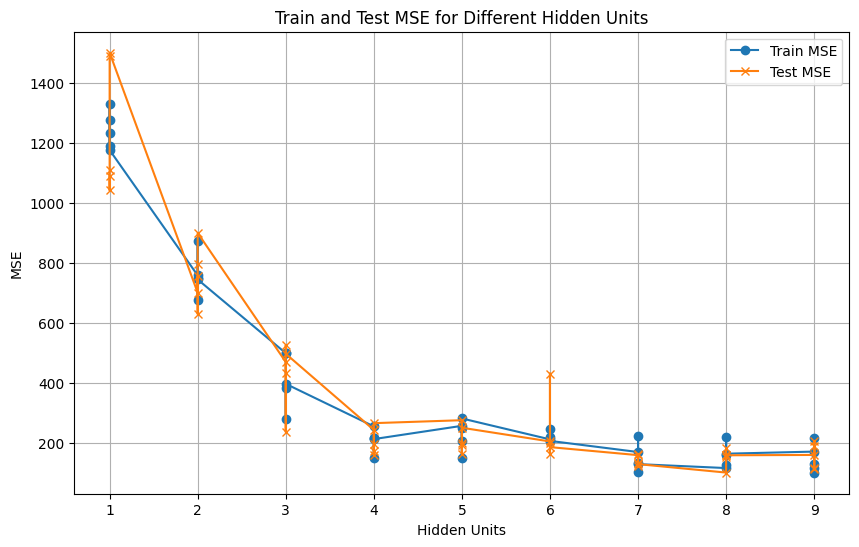

In [ ]:
rows = 9
cols = 5
num_matrices = 5  # You can change this to the number of matrices you want

matrices_tuple = tuple(np.empty((5, 9)) for _ in range(5))

## Outer Loop
for i1 in range(k1):
    print('outer loop: ', i1+1)
    results_table['i'][i1] = i1+1

    # Train and test split for the outer loop
    outer_start = int(i1*row_number)
    outer_end = int((i1+1)*row_number)

    X_train_ann = np.vstack((X_std[:outer_start], X_std[outer_end:]))
    X_test_ann = X_std[outer_start:outer_end]

    Y_train_ann = np.concatenate((y[:outer_start], y[outer_end:]))
    Y_test_ann = y[outer_start:outer_end]

    row_number_inner = np.floor(X_train_ann.shape[0]/k2)
    hidden_units = np.arange(1,10,1)
    test_error_inner_ann = np.zeros((len(hidden_units), (k2)))

    train_mse_values = np.zeros((len(hidden_units), k2))
    test_mse_values = np.zeros((len(hidden_units), k2))

    ## Inner loop cross validation
    for i2 in range(k2):
        inner_start = int(i2 * row_number_inner)
        inner_end = int((i2 + 1) * row_number_inner)

        # Modify the train and test splits for the inner loop
        X_train_ann_inner = np.vstack((X_train_ann[:inner_start], X_train_ann[inner_end:]))
        X_test_ann_inner = X_train_ann[inner_start:inner_end]

        Y_train_ann_inner = np.concatenate((Y_train_ann[:inner_start], Y_train_ann[inner_end:]))
        Y_test_ann_inner = Y_train_ann[inner_start:inner_end]


        #transformation into tensors
        X_train_inner_ts = torch.Tensor(X_train_ann_inner)
        X_test_inner_ts = torch.Tensor(X_test_ann_inner)
        Y_train_inner_ts = torch.Tensor(Y_train_ann_inner)
        Y_test_inner_ts = torch.Tensor(Y_test_ann_inner)

        count = 0
        loss = torch.nn.MSELoss()


        h_idx = 0
        for h in hidden_units:
            model = lambda: torch.nn.Sequential(
                torch.nn.Linear(X_train_inner_ts.shape[1], h),
                torch.nn.Tanh(),
                torch.nn.Linear(h,1),)

            net, final_loss, learning_curve = train_neural_net(model, loss, X=X_train_inner_ts, y=Y_train_inner_ts, n_replicates=1, max_iter=10000)


            y_test_est = net(X_test_inner_ts)

            # Calculate the mean squared error (MSE) using PyTorch functions
            se = torch.pow(y_test_est - Y_test_inner_ts, 2)
            mse = torch.mean(se).item()

            test_error_inner_ann[count, i2] = mse

            # Store the train and test MSE values for each hidden unit
            train_mse_values[count, i2] = final_loss
            test_mse_values[count, i2] = mse

            count += 1

            print(f"Inner loop {i2 + 1}, Hidden Units: {h}, Test MSE: {mse}")
            matrix = matrices_tuple[i1]
            matrix[i2][h-1] = mse

    gen_error_inner_ann = np.mean(test_error_inner_ann, axis=1).T


# Flatten train and test MSE values for plotting
train_mse_values = train_mse_values.flatten()
test_mse_values = test_mse_values.flatten()
pd.DataFrame(test_mse_values).to_csv("test_mse_values.csv")


# Create a list of hidden units for the x-axis
hidden_units_list = [h for h in hidden_units for _ in range(k2)]

# Create a figure and plot the train and test MSE values
plt.figure(figsize=(10, 6))
plt.plot(hidden_units_list, train_mse_values, label='Train MSE', marker='o')
plt.plot(hidden_units_list, test_mse_values, label='Test MSE', marker='x')
plt.xlabel('Hidden Units')
plt.ylabel('MSE')
plt.title('Train and Test MSE for Different Hidden Units')
plt.legend()
plt.grid()
plt.show()


The best hidden unit was with h = 7

In [ ]:
outer_average_0 = []
medias_columnas_0 = np.mean(matrices_tuple[0], axis=0)
for i in range(9):
  print(f'hidden_unit {i+1} average in outer loop 0 is {medias_columnas_0[i]}')


hidden_unit 1 average in outer loop 0 is 1261.0439819335938
hidden_unit 2 average in outer loop 0 is 841.1824462890625
hidden_unit 3 average in outer loop 0 is 420.8509002685547
hidden_unit 4 average in outer loop 0 is 184.93226318359376
hidden_unit 5 average in outer loop 0 is 266.0276275634766
hidden_unit 6 average in outer loop 0 is 144.9181655883789
hidden_unit 7 average in outer loop 0 is 150.09356079101562
hidden_unit 8 average in outer loop 0 is 114.0353012084961
hidden_unit 9 average in outer loop 0 is 151.2228576660156


In [ ]:
outer_average_1 = []
medias_columnas_1 = np.mean(matrices_tuple[1], axis=0)
for i in range(9):
  print(f'hidden_unit {i+1} average in outer loop 1 is {medias_columnas_1[i]}')

hidden_unit 1 average in outer loop 1 is 1388.574462890625
hidden_unit 2 average in outer loop 1 is 855.3675659179687
hidden_unit 3 average in outer loop 1 is 363.7243255615234
hidden_unit 4 average in outer loop 1 is 353.2837219238281
hidden_unit 5 average in outer loop 1 is 230.89424743652344
hidden_unit 6 average in outer loop 1 is 158.84803466796876
hidden_unit 7 average in outer loop 1 is 133.74309387207032
hidden_unit 8 average in outer loop 1 is 151.57510070800782
hidden_unit 9 average in outer loop 1 is 115.5952651977539


In [ ]:
outer_average_2 = []
medias_columnas_2 = np.mean(matrices_tuple[2], axis=0)
for i in range(9):
  print(f'hidden_unit {i+1} average in outer loop 2 is {medias_columnas_2[i]}')


hidden_unit 1 average in outer loop 2 is 1262.5491943359375
hidden_unit 2 average in outer loop 2 is 705.2319885253906
hidden_unit 3 average in outer loop 2 is 473.7860473632812
hidden_unit 4 average in outer loop 2 is 193.9899429321289
hidden_unit 5 average in outer loop 2 is 258.8351028442383
hidden_unit 6 average in outer loop 2 is 190.27640838623046
hidden_unit 7 average in outer loop 2 is 157.96171112060546
hidden_unit 8 average in outer loop 2 is 307.1931579589844
hidden_unit 9 average in outer loop 2 is 226.4801223754883


In [ ]:
outer_average_3 = []
medias_columnas_3 = np.mean(matrices_tuple[3], axis=0)
for i in range(9):
  print(f'hidden_unit {i+1} average in outer loop 3 is {medias_columnas_3[i]}')

hidden_unit 1 average in outer loop 3 is 1212.348583984375
hidden_unit 2 average in outer loop 3 is 771.0638427734375
hidden_unit 3 average in outer loop 3 is 329.85341796875
hidden_unit 4 average in outer loop 3 is 204.4960693359375
hidden_unit 5 average in outer loop 3 is 330.40537719726564
hidden_unit 6 average in outer loop 3 is 211.24207305908203
hidden_unit 7 average in outer loop 3 is 126.15244598388672
hidden_unit 8 average in outer loop 3 is 106.49607543945312
hidden_unit 9 average in outer loop 3 is 109.18307495117188


In [ ]:
outer_average_4 = []
medias_columnas_4 = np.mean(matrices_tuple[4], axis=0)
for i in range(9):
  print(f'hidden_unit {i+1} average in outer loop 4 is {medias_columnas_4[i]}')

hidden_unit 1 average in outer loop 4 is 1246.4059326171875
hidden_unit 2 average in outer loop 4 is 756.2989624023437
hidden_unit 3 average in outer loop 4 is 432.03272705078126
hidden_unit 4 average in outer loop 4 is 207.51809997558593
hidden_unit 5 average in outer loop 4 is 215.85684204101562
hidden_unit 6 average in outer loop 4 is 236.0190460205078
hidden_unit 7 average in outer loop 4 is 141.30578002929687
hidden_unit 8 average in outer loop 4 is 150.28101196289063
hidden_unit 9 average in outer loop 4 is 156.15462646484374


In [ ]:
print(matrices_tuple[0])

[[ 979.76019287  598.36401367  220.58027649  131.37030029  129.06509399
    96.57421875   90.13780212   95.90036011   88.68846893]
 [1166.60571289  602.9786377   302.65124512  151.96505737  131.75733948
   146.78198242  137.00569153  123.09551239  122.92662048]
 [1249.73327637  745.60070801  415.48101807  180.14794922  152.85971069
   118.04268646   97.8140564   126.63092804  127.50257874]
 [1378.70227051 1048.29553223  655.02514648  329.12399292  292.35864258
   146.77459717  116.92260742  122.63587952  127.00113678]
 [1530.41845703 1210.67333984  510.51681519  132.05401611  624.09735107
   216.41734314  308.58764648  101.91382599  289.9954834 ]]


In [ ]:
print(matrices_tuple[1])

[[1029.14038086  588.71606445  233.96080017  140.9768219   276.25692749
    84.25154877   84.00151825   79.91081238   79.40265656]
 [1191.32080078  686.10980225  311.82699585  170.13899231  131.20346069
   147.37380981  125.19296265  120.42199707  120.4329834 ]
 [1197.5723877   668.05169678  484.00906372  365.19830322  157.40814209
   276.51290894  271.44351196   88.39961243  101.98377228]
 [1732.01123047  733.33105469  593.793396    302.62130737  189.46554565
   182.99412537  152.60861206  104.11686707  104.65002441]
 [1574.7121582  1158.23632812  500.90240479  945.87347412  225.02401733
   295.14825439  126.14503479  307.98278809   98.01050568]]


In [ ]:
print(matrices_tuple[2])

[[1189.99206543  621.78790283  269.66412354  231.76150513  176.96772766
    91.9570694   140.37239075   95.89081573   78.77936554]
 [ 930.02856445  746.1786499   249.73789978   89.89802551  121.90067291
    91.12221527  101.15903473   85.5887146    85.27945709]
 [1217.44616699  636.33935547  326.29196167  135.47348022  212.57450867
    77.30727386   90.89035797   76.95508575   84.00418091]
 [1584.47021484  859.14221191  492.17697144  327.80285645  541.54827881
    91.86663055  120.9299469   162.5083313   162.14616394]
 [1579.43493652 1235.47473145  689.53778076 1044.95629883  416.04473877
   305.61410522  325.4223938   340.95593262  155.43450928]]


In [ ]:
print(matrices_tuple[4])

[[1182.13842773  747.14086914  353.1619873   304.06378174  184.73626709
   340.32333374  218.16506958  160.67420959  126.32176208]
 [1126.53320312  627.86120605  308.44671631  264.79095459  166.57019043
   110.13360596  291.60009766  161.56182861  159.66882324]
 [1097.43261719  692.0880127   395.44320679  229.69816589  160.96495056
   130.23912048  161.47373962  139.08869934  163.64497375]
 [1222.75708008  805.31188965  322.77044678  425.7600708   237.14285278
   154.41279602  235.26994324  330.19580078  463.24642944]
 [1595.24560547  845.30200195  452.8710022   242.01963806  195.83255005
   244.44256592  125.31190491  158.37245178  105.91539001]]


In [ ]:
print(matrices_tuple[4])

NameError: ignored

#### Ann con h=8 y cross validation

In [ ]:
## number of iterations outer loop
k1_h6 = 5
## number of iterations iner loop
k2_h6 = 5

## results table with number of rows equal to k1
results_table_h6 = pd.DataFrame(columns = ['i', 'h*', 'E_test_ann'], index=range(k1_h6))

## Split the data into k1 approximately equal-seized parts
row_number_h6 = np.floor(X_std.shape[0]/k1_h6)

iteration = 0

## To store test errors of the ann
test_error_outer_ann_h6 = np.zeros((k1_h6))

In [ ]:
train_mse_values_h6 = []
test_mse_values_h6 = []
test_mse_ANN = []

## Outer Loop
for i1 in range(k1_h6):
    print('outer loop: ', i1+1)
    results_table_h6['i'][i1] = i1+1

    # Train and test split for the outer loop
    outer_start = int(i1*row_number)
    outer_end = int((i1+1)*row_number)

    X_train_ann = np.vstack((X_std[:outer_start], X_std[outer_end:]))
    X_test_ann = X_std[outer_start:outer_end]

    Y_train_ann = np.concatenate((y[:outer_start], y[outer_end:]))
    Y_test_ann = y[outer_start:outer_end]

    row_number_inner = np.floor(X_train_ann.shape[0]/k2_h6)
    hidden_units = 8
    test_error_inner_ann = np.zeros((1, (k2_h6)))

    train_mse_values = np.zeros((1, k2_h6))
    test_mse_values = np.zeros((1, k2_h6))

    ## Inner loop cross validation
    for i2 in range(k2_h6):
        inner_start = int(i2 * row_number_inner)
        inner_end = int((i2 + 1) * row_number_inner)

        # Modify the train and test splits for the inner loop
        X_train_ann_inner = np.vstack((X_train_ann[:inner_start], X_train_ann[inner_end:]))
        X_test_ann_inner = X_train_ann[inner_start:inner_end]

        Y_train_ann_inner = np.concatenate((Y_train_ann[:inner_start], Y_train_ann[inner_end:]))
        Y_test_ann_inner = Y_train_ann[inner_start:inner_end]


        #transformation into tensors
        X_train_inner_ts = torch.Tensor(X_train_ann_inner)
        X_test_inner_ts = torch.Tensor(X_test_ann_inner)
        Y_train_inner_ts = torch.Tensor(Y_train_ann_inner)
        Y_test_inner_ts = torch.Tensor(Y_test_ann_inner)

        loss_h6 = torch.nn.MSELoss()

        model = lambda: torch.nn.Sequential(
            torch.nn.Linear(X_train_inner_ts.shape[1], hidden_units),
            torch.nn.Tanh(),
            torch.nn.Linear(hidden_units,1),)

        net, final_loss_h6, learning_curve = train_neural_net(model, loss, X=X_train_inner_ts, y=Y_train_inner_ts, n_replicates=1, max_iter=10000)
        train_mse_values_h6.append(final_loss_h6)


        y_test_est = net(X_test_inner_ts)

        # Calculate the mean squared error (MSE) using PyTorch functions
        se = torch.pow(y_test_est - Y_test_inner_ts, 2)
        mse_h6 = torch.mean(se).item()
        test_mse_values_h6.append(mse_h6)

        if i2 == k2_h6 - 1:
          test_mse_ANN.append(np.mean(test_mse_values_h6))
          print(test_mse_ANN)
          test_mse_values_h6 = []

    gen_error_inner_ann_h6 = np.mean(test_error_inner_ann, axis=1).T

print(train_mse_values_h6)
print(test_mse_values_h6)

outer loop:  1


NameError: ignored

#### TEST ESTADISTICOS - SET UP II. The training set is random (pagina 229 libro). Estamos haciendo el correlated t-test

In [ ]:
def correlated_ttest(r, rho, alpha=0.05):
    rhat = np.mean(r)
    shat = np.std(r)
    J = len(r)
    sigmatilde = shat * np.sqrt(1 / J + rho / (1 - rho))

    CI = st.t.interval(1 - alpha, df=J - 1, loc=rhat, scale=sigmatilde)  # Confidence interval
    p = 2*st.t.cdf(-np.abs(rhat) / sigmatilde, df=J - 1)  # p-value
    return p, CI

##### Lasso vs baseline (hecho junto con interpretacion)

In [ ]:
# Calcula las diferencias de pérdida (zi) entre Lasso y el modelo de referencia
zi = [baseline_mse - lasso_mse for baseline_mse, lasso_mse in zip(baseline_results, lasso_results)]

# Llama a la función 'correlated_ttest' con tus datos para realizar el test estadístico
p_value, confidence_interval = correlated_ttest(zi, rho=0, alpha=0.05)

# Imprime los resultados del test estadístico
print(f'P-valor: {p_value}')
print(f'Intervalo de confianza: {confidence_interval}')

NameError: ignored

##### lasso vs ann

In [ ]:
ann_results = test_mse_ANN
# Calcula las diferencias de pérdida (zi) entre Lasso y el modelo de referencia
zi = [ann_mse - lasso_mse for ann_mse, lasso_mse in zip(ann_results, lasso_results[0:5])]

# Llama a la función 'correlated_ttest' con tus datos para realizar el test estadístico
p_value, confidence_interval = correlated_ttest(zi, rho=0, alpha=0.05)

# Imprime los resultados del test estadístico
print(f'P-valor: {p_value}')
print(f'Intervalo de confianza: {confidence_interval}')

P-valor: 0.000438677962850484
Intervalo de confianza: (91.93181458372395, 156.68950864168772)


##### ann vs baseline

In [ ]:
# Calcula las diferencias de pérdida (zi) entre Lasso y el modelo de referencia
zi = [baseline_mse - ann_mse for baseline_mse, ann_mse in zip(baseline_results[0:5], ann_results)]

# Llama a la función 'correlated_ttest' con tus datos para realizar el test estadístico
p_value, confidence_interval = correlated_ttest(zi, rho=0, alpha=0.05)

# Imprime los resultados del test estadístico
print(f'P-valor: {p_value}')
print(f'Intervalo de confianza: {confidence_interval}')

P-valor: 0.001005229556750281
Intervalo de confianza: (-135.2267430114519, -69.21376566974955)


## CLASSIFICATION A

### Data

In [ ]:
#Eliminar columnas de output (y) y de age (lo que vamos a predecir)
X_class = one_hot_encoded_data.drop(columns=['output'], axis=1)
#la salida es la age
y_clf = one_hot_encoded_data['output']


# Crear una instancia del StandardScaler
#La instancia del objeto StandardScaler se crea con
# los parámetros predeterminados, lo que significa que se centrará
# y escalará las características para tener una media cero y una
# varianza unitaria. Luego, se crea un nuevo DataFrame llamado
# X_std con las características transformadas

scaler = StandardScaler()

# Ajustar y transformar las características (X)
X_clf = pd.DataFrame(scaler.fit_transform(X_class), columns=X_class.columns)
X_clf.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall_1,thall_2,thall_3
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,3.972125,-1.112222,-0.795256
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.251754,0.899101,-0.795256


In [ ]:
#X_std dataset ya escalado
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, random_state=42, test_size=0.2)

### BASELINE
The baseline will be a model which compute the largest class on the training
data, and predict everything in the test-data as belonging to that class (corresponding to the optimal prediction by a logistic regression model with a bias
term and no features).

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Function to calculate the baseline logistic classifier model
def calculate_baseline_classifier(X_train, y_train, X_test):
    # Calculate the most frequent class in the training data
    most_frequent_class = np.bincount(y_train).argmax()

    # Predict all test samples as belonging to the most frequent class
    y_pred = np.full(X_test.shape[0], most_frequent_class)

    return y_pred

def double_cross_validation_baseline_classifier(X, y, n_outer_splits=10, n_inner_splits=10):
    cv_outer = KFold(n_splits=n_outer_splits, shuffle=True, random_state=42)

    baseline_error_rates = []  # List to store the error rates of the baseline models

    pointer = 1
    for train_index, test_index in cv_outer.split(X, y):
        print('\nOuter CV: {} of {} outer fold'.format(pointer, n_outer_splits))
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        inner_baseline_error_rates = []  # List to store the error rates of the baseline models

        inner_pointer = 1

        for inner_train_index, inner_test_index in cv_outer.split(x_train, y_train):
            x_inner_train, x_inner_test = x_train.iloc[inner_train_index], x_train.iloc[inner_test_index]
            y_inner_train, y_inner_test = y_train.iloc[inner_train_index], y_train.iloc[inner_test_index]

            # Calculate the baseline logistic classifier model's predictions
            y_pred = calculate_baseline_classifier(x_inner_train, y_inner_train, x_inner_test)

            # Calculate error rate for the baseline model
            error_rate = sum(y_pred != y_inner_test) / len(y_inner_test)
            inner_baseline_error_rates.append(error_rate)

            print("Outer CV: {}, Inner CV: {}, Baseline Error Rate: {:.3f}".format(pointer, inner_pointer, error_rate))
            inner_pointer += 1

        # Calculate the average error rate for the baseline model for this outer fold
        baseline_mean_error_rate = np.mean(inner_baseline_error_rates)
        baseline_error_rates.append(baseline_mean_error_rate)

        print("Outer CV: {}, Average Baseline Error Rate: {:.3f}".format(pointer, baseline_mean_error_rate))
        pointer += 1

    return baseline_error_rates

# Execute double cross-validation for the baseline logistic classifier
baseline_classifier_results = double_cross_validation_baseline_classifier(X_clf, y_clf)



Outer CV: 1 of 10 outer fold
Outer CV: 1, Inner CV: 1, Baseline Error Rate: 0.500
Outer CV: 1, Inner CV: 2, Baseline Error Rate: 0.333
Outer CV: 1, Inner CV: 3, Baseline Error Rate: 0.407
Outer CV: 1, Inner CV: 4, Baseline Error Rate: 0.444
Outer CV: 1, Inner CV: 5, Baseline Error Rate: 0.481
Outer CV: 1, Inner CV: 6, Baseline Error Rate: 0.519
Outer CV: 1, Inner CV: 7, Baseline Error Rate: 0.481
Outer CV: 1, Inner CV: 8, Baseline Error Rate: 0.407
Outer CV: 1, Inner CV: 9, Baseline Error Rate: 0.481
Outer CV: 1, Inner CV: 10, Baseline Error Rate: 0.519
Outer CV: 1, Average Baseline Error Rate: 0.457

Outer CV: 2 of 10 outer fold
Outer CV: 2, Inner CV: 1, Baseline Error Rate: 0.500
Outer CV: 2, Inner CV: 2, Baseline Error Rate: 0.333
Outer CV: 2, Inner CV: 3, Baseline Error Rate: 0.407
Outer CV: 2, Inner CV: 4, Baseline Error Rate: 0.407
Outer CV: 2, Inner CV: 5, Baseline Error Rate: 0.481
Outer CV: 2, Inner CV: 6, Baseline Error Rate: 0.519
Outer CV: 2, Inner CV: 7, Baseline Error Ra

### LOGISTIC CLASSIFIER WITH λ

Ridge results:  {0.001: 0.17012448132780078, 0.101: 0.17427385892116187, 0.201: 0.17427385892116187, 0.30100000000000005: 0.17012448132780078, 0.401: 0.17012448132780078, 0.501: 0.17012448132780078, 0.6010000000000001: 0.17012448132780078, 0.7010000000000001: 0.17427385892116187, 0.801: 0.17427385892116187, 0.901: 0.17427385892116187, 1.001: 0.17427385892116187, 1.101: 0.17427385892116187, 1.201: 0.17427385892116187, 1.301: 0.17427385892116187, 1.401: 0.17427385892116187, 1.501: 0.17012448132780078, 1.601: 0.17012448132780078, 1.701: 0.17012448132780078, 1.801: 0.17012448132780078, 1.901: 0.1659751037344398, 2.001: 0.1659751037344398, 2.101: 0.17012448132780078, 2.201: 0.17012448132780078, 2.301: 0.17012448132780078, 2.4010000000000002: 0.17427385892116187, 2.501: 0.17427385892116187, 2.601: 0.17427385892116187, 2.701: 0.17012448132780078, 2.801: 0.17012448132780078, 2.9010000000000002: 0.17012448132780078, 3.001: 0.17012448132780078, 3.101: 0.17012448132780078, 3.201: 0.17012448132780

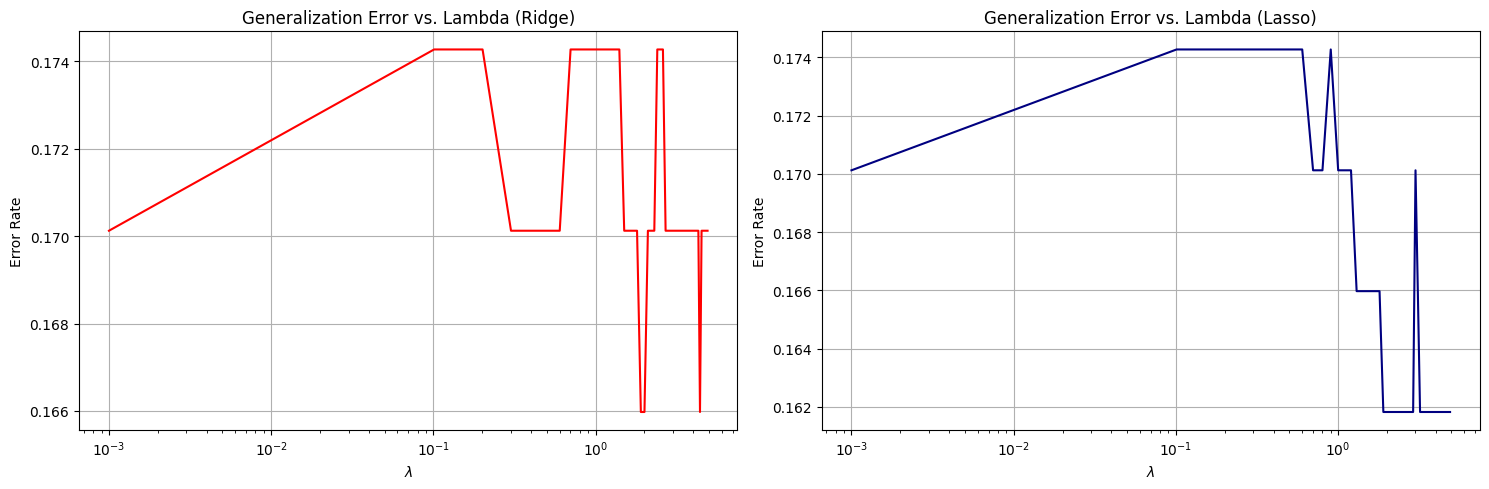

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define a range of lambda values to test (excluding lambda_val = 0)
lambda_values = np.arange(1e-3, 5, 0.1)

# Dictionaries to store results for different models
ridge_results = {}
lasso_results = {}

# Perform k-fold cross-validation for different lambda values
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for lambda_val in lambda_values:
    # Ridge Logistic Regression Model
    ridge_model = LogisticRegression(penalty='l2', C=1/lambda_val, solver='liblinear')
    ridge_preds = cross_val_predict(ridge_model, X_train, y_train, cv=kfold)
    ridge_error_rate = 1 - accuracy_score(y_train, ridge_preds)
    ridge_results[lambda_val] = ridge_error_rate

    # Lasso Logistic Regression Model
    lasso_model = LogisticRegression(penalty='l1', C=1/lambda_val, solver='liblinear')
    lasso_preds = cross_val_predict(lasso_model, X_train, y_train, cv=kfold)
    lasso_error_rate = 1 - accuracy_score(y_train, lasso_preds)
    lasso_results[lambda_val] = lasso_error_rate

print("Ridge results: ", ridge_results)
print("Lasso results: ", lasso_results)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot results for Ridge Logistic Regression
ax1.plot(lambda_values, list(ridge_results.values()), linestyle='-', color='red', label='Ridge')
ax1.set_xlabel('$λ$')
ax1.set_ylabel('Error Rate')
ax1.set_title('Generalization Error vs. Lambda (Ridge)')
ax1.set_xscale('log')
ax1.grid(True)

# Plot results for Lasso Logistic Regression
ax2.plot(lambda_values, list(lasso_results.values()), linestyle='-', color='navy', label='Lasso')
ax2.set_xlabel('$λ$')
ax2.set_ylabel('Error Rate')
ax2.set_title('Generalization Error vs. Lambda (Lasso)')
ax2.set_xscale('log')
ax2.grid(True)

# Adjust subplots to avoid overlapping
plt.tight_layout()

# Show the figure on the screen
plt.show()


In [ ]:
# Encuentra el mejor valor de lambda para Ridge
best_lambda_ridge = min(ridge_results, key=ridge_results.get)
best_error_rate_ridge = ridge_results[best_lambda_ridge]

# Encuentra el mejor valor de lambda para Lasso
best_lambda_lasso = min(lasso_results, key=lasso_results.get)
best_error_rate_lasso = lasso_results[best_lambda_lasso]

print("Mejor valor de lambda para Ridge:", best_lambda_ridge)
print("Error Rate correspondiente a Ridge:", best_error_rate_ridge)
print("")
print("Mejor valor de lambda para Lasso:", best_lambda_lasso)
print("Error Rate correspondiente a Lasso:", best_error_rate_lasso)

Mejor valor de lambda para Ridge: 1.901
Error Rate correspondiente a Ridge: 0.1659751037344398

Mejor valor de lambda para Lasso: 1.901
Error Rate correspondiente a Lasso: 0.16182572614107882


por lo tanto usaremos un lasso de 1.9 (aunq daria igual)

### KNN

Mejor valor de K: 7

Error Rate mínimo: 0.16182572614107882


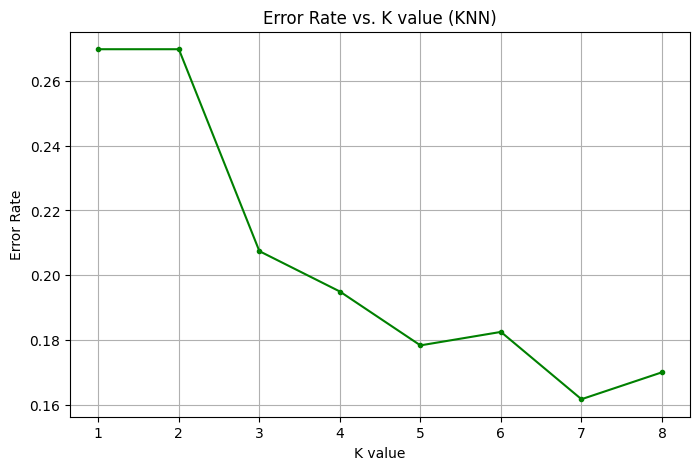

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define una lista de valores de K que deseas probar
k_values = [1, 2, 3, 4, 5,6,7,8]

# Diccionario para almacenar los resultados de error rate para diferentes valores de K
knn_results = {}

# Realiza k-fold cross-validation para diferentes valores de K
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for k in k_values:
    # Modelo KNN con el valor de K actual
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_preds = cross_val_predict(knn_model, X_train, y_train, cv=kfold)
    knn_error_rate = 1 - accuracy_score(y_train, knn_preds)
    knn_results[k] = knn_error_rate

# print("Error Rates para diferentes valores de K:", knn_results)

# Encuentra el valor de K que minimiza el error rate
best_k = min(knn_results, key=knn_results.get)
best_error_rate = knn_results[best_k]

print("Mejor valor de K:", best_k)
print("")
print("Error Rate mínimo:", best_error_rate)

# Crea un gráfico para visualizar el error rate para diferentes valores de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, list(knn_results.values()), marker='.', linestyle='-', color='green')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K value (KNN)')
plt.grid(True)

plt.savefig('knnvalues.pdf')


plt.show()


por lo tanto usaremos KNN con un vlaor de K=7

### 2 level cv para los modelos

#### BASELINE
La doble CV se ha hecho arriba, no hace falta hacerla otra vez pero si preguntar a los TA qué pasa que siempre obtenemos 1 de error rate (es normal porque se clasifica siempre como la clase mas comun)

#### LASSO

In [ ]:
# Valores de alpha que deseas probar en el rango de 0.1 a 5 con un salto de 0.1
alpha_values = np.arange(0.1, 5.01, 0.1)

# Lista para almacenar los resultados
results = []

# Realiza k-fold cross-validation para diferentes valores de alpha
kfold_outer = KFold(n_splits=10, shuffle=True, random_state=42)
kfold_inner = KFold(n_splits=10, shuffle=True, random_state=42)

pointer = 1
for train_index, test_index in kfold_outer.split(X_clf, y_clf):
    print('\nOuter CV: {} of 10 outer folds'.format(pointer))
    x_train_outer, x_test_outer = X_clf.iloc[train_index], X_clf.iloc[test_index]
    y_train_outer, y_test_outer = y_clf.iloc[train_index], y_clf.iloc[test_index]

    inner_error_rates = []  # Lista para almacenar los error rates de las inner folds
    inner_alpha_values = []  # Lista para almacenar los mejores valores de alpha para cada inner fold

    inner_pointer = 1
    for inner_train_index, inner_test_index in kfold_outer.split(x_train_outer, y_train_outer):
        x_train_inner, x_test_inner = x_train_outer.iloc[inner_train_index], x_train_outer.iloc[inner_test_index]
        y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[inner_test_index]

        best_inner_alpha = None
        best_inner_error_rate = 1.0

        for alpha_inner in alpha_values:
            # Modelo de regresión logística con el valor de alpha actual (que es un hiperparámetro de Lasso)
            lasso_logistic_model = LogisticRegression(penalty='l1', C=1/alpha_inner, solver='liblinear')
            lasso_logistic_model.fit(x_train_inner, y_train_inner)
            lasso_logistic_preds = lasso_logistic_model.predict(x_test_inner)

            # Calcular el error rate para esta inner fold
            inner_error_rate = 1 - accuracy_score(y_test_inner, lasso_logistic_preds)

            if inner_error_rate < best_inner_error_rate:
                best_inner_error_rate = inner_error_rate
                best_inner_alpha = alpha_inner

            inner_error_rates.append(inner_error_rate)
            inner_alpha_values.append(best_inner_alpha)

        print("Outer CV: {}, Inner CV: {}, Best Alpha: {}, Error Rate: {:.3f}".format(pointer, inner_pointer, best_inner_alpha, best_inner_error_rate))
        inner_pointer += 1

    # Obtiene el valor de alpha que se repite más veces en la lista de mejores alpha
    best_outer_alpha = max(set(inner_alpha_values), key=inner_alpha_values.count)

    # Calcula la media de los error rates de las inner folds
    mean_inner_error_rate = np.mean(inner_error_rates)

    results.append((pointer, best_outer_alpha, mean_inner_error_rate))
    print("Outer CV: {}, Most Frequent Best Alpha: {}, Mean Inner Error Rate: {:.3f}".format(pointer, best_outer_alpha, mean_inner_error_rate))
    pointer += 1

# Crea un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=["Outer Fold", "Best Alpha", "Mean Inner Error Rate"])
results_df



Outer CV: 1 of 10 outer folds
Outer CV: 1, Inner CV: 1, Best Alpha: 0.1, Error Rate: 0.179
Outer CV: 1, Inner CV: 2, Best Alpha: 2.2, Error Rate: 0.111
Outer CV: 1, Inner CV: 3, Best Alpha: 3.1, Error Rate: 0.185
Outer CV: 1, Inner CV: 4, Best Alpha: 0.1, Error Rate: 0.185
Outer CV: 1, Inner CV: 5, Best Alpha: 0.1, Error Rate: 0.111
Outer CV: 1, Inner CV: 6, Best Alpha: 0.1, Error Rate: 0.037
Outer CV: 1, Inner CV: 7, Best Alpha: 3.0000000000000004, Error Rate: 0.185
Outer CV: 1, Inner CV: 8, Best Alpha: 0.1, Error Rate: 0.037
Outer CV: 1, Inner CV: 9, Best Alpha: 0.1, Error Rate: 0.296
Outer CV: 1, Inner CV: 10, Best Alpha: 4.7, Error Rate: 0.185
Outer CV: 1, Most Frequent Best Alpha: 0.1, Mean Inner Error Rate: 0.165

Outer CV: 2 of 10 outer folds
Outer CV: 2, Inner CV: 1, Best Alpha: 3.8000000000000003, Error Rate: 0.071
Outer CV: 2, Inner CV: 2, Best Alpha: 2.8000000000000003, Error Rate: 0.074
Outer CV: 2, Inner CV: 3, Best Alpha: 0.7000000000000001, Error Rate: 0.259
Outer CV: 2

,Outer Fold,Best Alpha,Mean Inner Error Rate
0,1,0.1,0.165487
1,2,0.1,0.161860
2,3,0.1,0.157571
3,4,0.1,0.161090
4,5,0.1,0.159794
5,6,0.1,0.164646
6,7,0.1,0.151593
7,8,0.1,0.157270
8,9,0.1,0.168921
9,10,0.1,0.155108


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define una lista de valores de K que deseas probar
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Lista para almacenar los resultados
results = []

# Realiza k-fold cross-validation para diferentes valores de K
kfold_outer = KFold(n_splits=10, shuffle=True, random_state=42)
kfold_inner = KFold(n_splits=10, shuffle=True, random_state=42)

pointer = 1
for train_index, test_index in kfold_outer.split(X_clf, y_clf):
    print('\nOuter CV: {} of 10 outer folds'.format(pointer))
    x_train_outer, x_test_outer = X_clf.iloc[train_index], X_clf.iloc[test_index]
    y_train_outer, y_test_outer = y_clf.iloc[train_index], y_clf.iloc[test_index]

    inner_error_rates = []  # Lista para almacenar los error rates de las inner folds
    inner_k_values = []  # Lista para almacenar los mejores valores de K para cada inner fold

    inner_pointer = 1
    for inner_train_index, inner_test_index in kfold_outer.split(x_train_outer, y_train_outer):
        x_train_inner, x_test_inner = x_train_outer.iloc[inner_train_index], x_train_outer.iloc[inner_test_index]
        y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[inner_test_index]

        best_inner_k = None
        best_inner_error_rate = 1.0

        for k_inner in k_values:
            # Modelo KNN con el valor de K actual
            knn_model = KNeighborsClassifier(n_neighbors=k_inner)
            knn_model.fit(x_train_inner, y_train_inner)
            knn_preds = knn_model.predict(x_test_inner)

            # Calcular el error rate para esta inner fold
            inner_error_rate = 1 - accuracy_score(y_test_inner, knn_preds)

            if inner_error_rate < best_inner_error_rate:
                best_inner_error_rate = inner_error_rate
                best_inner_k = k_inner

            inner_error_rates.append(inner_error_rate)
            inner_k_values.append(best_inner_k)

        print("Outer CV: {}, Inner CV: {}, Best K: {}, Error Rate: {:.3f}".format(pointer, inner_pointer, best_inner_k, best_inner_error_rate))
        inner_pointer += 1

    # Obtiene el valor de K que se repite más veces en la lista de mejores K
    best_outer_k = max(set(inner_k_values), key=inner_k_values.count)

    # Obtiene la media de los error rates de las inner folds
    mean_inner_error_rate = np.mean(inner_error_rates)

    results.append((pointer, best_outer_k, mean_inner_error_rate))
    print("Outer CV: {}, Most Frequent Best K: {}, Mean Inner Error Rate: {:.3f}".format(pointer, best_outer_k, mean_inner_error_rate))
    pointer += 1

# Crea un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=["Outer Fold", "Best K", "Mean Inner Error Rate"])
results_df



Outer CV: 1 of 10 outer folds
Outer CV: 1, Inner CV: 1, Best K: 6, Error Rate: 0.107
Outer CV: 1, Inner CV: 2, Best K: 4, Error Rate: 0.074
Outer CV: 1, Inner CV: 3, Best K: 7, Error Rate: 0.222
Outer CV: 1, Inner CV: 4, Best K: 6, Error Rate: 0.222
Outer CV: 1, Inner CV: 5, Best K: 1, Error Rate: 0.111
Outer CV: 1, Inner CV: 6, Best K: 5, Error Rate: 0.111
Outer CV: 1, Inner CV: 7, Best K: 6, Error Rate: 0.037
Outer CV: 1, Inner CV: 8, Best K: 6, Error Rate: 0.037
Outer CV: 1, Inner CV: 9, Best K: 3, Error Rate: 0.296
Outer CV: 1, Inner CV: 10, Best K: 8, Error Rate: 0.222
Outer CV: 1, Most Frequent Best K: 1, Mean Inner Error Rate: 0.203

Outer CV: 2 of 10 outer folds
Outer CV: 2, Inner CV: 1, Best K: 4, Error Rate: 0.036
Outer CV: 2, Inner CV: 2, Best K: 3, Error Rate: 0.111
Outer CV: 2, Inner CV: 3, Best K: 7, Error Rate: 0.148
Outer CV: 2, Inner CV: 4, Best K: 6, Error Rate: 0.037
Outer CV: 2, Inner CV: 5, Best K: 6, Error Rate: 0.148
Outer CV: 2, Inner CV: 6, Best K: 9, Error Ra

,Outer Fold,Best K,Mean Inner Error Rate
0,1,1,0.202791
1,2,3,0.201878
2,3,3,0.194286
3,4,2,0.202698
4,5,1,0.207513
5,6,1,0.199325
6,7,1,0.211958
7,8,1,0.190780
8,9,2,0.210595
9,10,1,0.198558


#### TEST ESTADISTICO - MCNEMERA

In [ ]:
def mcnemar(y_true, yhatA, yhatB, alpha=0.05):
    # perform McNemars test
    nn = np.zeros((2,2))
    c1 = yhatA - y_true == 0
    c2 = yhatB - y_true == 0

    nn[0,0] = sum(c1 & c2)
    nn[0,1] = sum(c1 & ~c2)
    nn[1,0] = sum(~c1 & c2)
    nn[1,1] = sum(~c1 & ~c2)

    n = sum(nn.flat);
    n12 = nn[0,1]
    n21 = nn[1,0]

    thetahat = (n12-n21)/n
    Etheta = thetahat

    Q = n**2 * (n+1) * (Etheta+1) * (1-Etheta) / ( (n*(n12+n21) - (n12-n21)**2) )

    p = (Etheta + 1)*0.5 * (Q-1)
    q = (1-Etheta)*0.5 * (Q-1)

    CI = tuple(lm * 2 - 1 for lm in scipy.stats.beta.interval(1-alpha, a=p, b=q) )

    p = 2*scipy.stats.binom.cdf(min([n12,n21]), n=n12+n21, p=0.5)
    print("Result of McNemars test using alpha=", alpha)
    print("Comparison matrix n")
    print(nn)
    if n12+n21 <= 10:
        print("Warning, n12+n21 is low: n12+n21=",(n12+n21))

    print("Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = ", CI)
    print("p-value for two-sided test A and B have same accuracy (exact binomial test): p=", p)

    return thetahat, CI, p

##### lasso vs baseline

In [ ]:
from sklearn.linear_model import LogisticRegression

def calculate_lasso_logistic(X_train, y_train, X_test, alpha):
    # Entrenar el modelo de regresión logística Lasso con el valor de alpha fijo
    lasso_logistic_model = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear')
    lasso_logistic_model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    lasso_logistic_preds = lasso_logistic_model.predict(X_test)

    return lasso_logistic_preds


In [ ]:
# Realiza k-fold cross-validation para obtener las predicciones del modelo Baseline y Lasso
baseline_predictions = []
lasso_predictions = []
y_true = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X_clf, y_clf):
    x_train, x_test = X_clf.iloc[train_index], X_clf.iloc[test_index]
    y_train, y_test = y_clf.iloc[train_index], y_clf.iloc[test_index]

    # Etiquetas verdaderas
    y_true.extend(y_test)

    # Calcula las predicciones del modelo Baseline
    baseline_pred = calculate_baseline_classifier(x_train, y_train, x_test)
    baseline_predictions.extend(baseline_pred)

    # Calcula las predicciones del modelo Lasso Logistic (con alpha fijo)
    alpha_lasso = 1.9
    lasso_pred = calculate_lasso_logistic(x_train, y_train, x_test, alpha_lasso)
    lasso_predictions.extend(lasso_pred)

# Convierte las listas de predicciones en matrices
y_true = np.array(y_true)
baseline_predictions = np.array(baseline_predictions)
lasso_predictions = np.array(lasso_predictions)

# Realiza el test de McNemar
yhatB = baseline_predictions  # Predicciones del modelo Baseline
yhatA = lasso_predictions  # Predicciones del modelo Lasso

# Realiza el test de McNemar
thetahat, CI, p_value = mcnemar(y_true, yhatA, yhatB, alpha=0.05)

print("McNemar's Test:")
print("Statistic (theta hat):", thetahat)
print("Confidence Interval:", CI)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the models.")


Result of McNemars test using alpha= 0.05
Comparison matrix n
[[146. 108.]
 [ 18.  30.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.23283404836405408, 0.36184779210305296)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 7.857578032825778e-17
McNemar's Test:
Statistic (theta hat): 0.2980132450331126
Confidence Interval: (0.23283404836405408, 0.36184779210305296)
p-value: 7.857578032825778e-17
Reject the null hypothesis: There is a significant difference between the models.


interpretacion:
Los resultados del test McNemar indican lo siguiente:

- **Result of McNemars test using alpha= 0.05**: Esta es una declaración de inicio que muestra que el test McNemar se realizó con un nivel de significancia (alpha) de 0.05.

- **Comparison matrix n**: Esta matriz muestra los resultados de las comparaciones entre dos modelos A y B. La matriz se desglosa de la siguiente manera:
    - En la esquina superior izquierda, tenemos 146, que representa el número de muestras que fueron clasificadas correctamente por ambos modelos A y B.
    - En la esquina superior derecha, tenemos 18, que representa el número de muestras que fueron clasificadas correctamente por el modelo A pero incorrectamente por el modelo B.
    - En la esquina inferior izquierda, tenemos 108, que representa el número de muestras que fueron clasificadas correctamente por el modelo B pero incorrectamente por el modelo A.
    - En la esquina inferior derecha, tenemos 30, que representa el número de muestras que fueron clasificadas incorrectamente por ambos modelos A y B.

- **Approximate 1-alpha confidence interval of theta: [thetaL,thetaU]**: Esto proporciona un intervalo de confianza aproximado para el valor de theta, que es una medida que indica la diferencia entre los modelos A y B. En este caso, el intervalo de confianza es (-0.36184779210305285, -0.23283404836405408). Un intervalo de confianza más estrecho indica una mayor precisión en la estimación.

- **p-value for two-sided test A and B have the same accuracy (exact binomial test)**: El valor p es una medida de la significancia estadística del test. En este caso, el valor p es extremadamente bajo, p ≈ 7.857578032825778e-17, lo que indica que la probabilidad de observar los resultados bajo la hipótesis nula (los modelos A y B tienen la misma precisión) es muy baja.

- **McNemar's Test**: Esta es una resumen del resultado del test McNemar.
    - **Statistic (theta hat)**: El valor de theta hat, que es aproximadamente -0.2980132450331126, representa la diferencia estimada entre los modelos A y B. Un valor negativo indica que el modelo A es mejor que el modelo B en términos de precisión.
    - **Confidence Interval**: Se repite el intervalo de confianza aproximado para theta.
    - **p-value**: Se repite el valor p.
    - **Reject the null hypothesis: There is a significant difference between the models**: Dado que el valor p es extremadamente bajo (mucho más bajo que el nivel de significancia alpha = 0.05), se rechaza la hipótesis nula. Esto significa que hay una diferencia significativa entre los modelos A y B en términos de precisión. En este caso, el modelo A parece ser significativamente mejor que el modelo B.

En resumen, los resultados del test McNemar sugieren que existe una diferencia significativa en la precisión entre los modelos A y B, y el modelo A parece ser el mejor de los dos.

##### lasso vs knn

In [ ]:
# Realiza k-fold cross-validation para obtener las predicciones del modelo Lasso y KNN
lasso_predictions = []
knn_predictions = []
y_true = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X_clf, y_clf):
    x_train, x_test = X_clf.iloc[train_index], X_clf.iloc[test_index]
    y_train, y_test = y_clf.iloc[train_index], y_clf.iloc[test_index]

    # Etiquetas verdaderas
    y_true.extend(y_test)

    # Calcula las predicciones del modelo Lasso (con alpha fijo)
    alpha_lasso = 1.9
    lasso_pred = calculate_lasso_logistic(x_train, y_train, x_test, alpha_lasso)
    lasso_predictions.extend(lasso_pred)

    # Calcula las predicciones del modelo KNN (con K=7)
    knn_model = KNeighborsClassifier(n_neighbors=7)
    knn_model.fit(x_train, y_train)
    knn_pred = knn_model.predict(x_test)
    knn_predictions.extend(knn_pred)

# Convierte las listas de predicciones en matrices
y_true = np.array(y_true)
lasso_predictions = np.array(lasso_predictions)
knn_predictions = np.array(knn_predictions)

# Realiza el test de McNemar
yhatA = lasso_predictions  # Predicciones del modelo Lasso
yhatB = knn_predictions  # Predicciones del modelo KNN

# Realiza el test de McNemar
thetahat, CI, p_value = mcnemar(y_true, yhatA, yhatB, alpha=0.05)

print("McNemar's Test (Lasso vs. KNN):")
print("Statistic (theta hat):", thetahat)
print("Confidence Interval:", CI)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between Lasso and KNN.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Lasso and KNN.")


Result of McNemars test using alpha= 0.05
Comparison matrix n
[[238.  16.]
 [ 11.  37.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (-0.017066264607073278, 0.05016038541585588)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.44206833839416504
McNemar's Test (Lasso vs. KNN):
Statistic (theta hat): 0.016556291390728478
Confidence Interval: (-0.017066264607073278, 0.05016038541585588)
p-value: 0.44206833839416504
Fail to reject the null hypothesis: There is no significant difference between Lasso and KNN.


interpretacion:
Los resultados del test de McNemar comparando el modelo Lasso y el modelo KNN con K=7 indican lo siguiente:

- **Comparison matrix n**: Esta matriz muestra el número de muestras en las cuales ambos modelos acertaron (parte superior izquierda), el número en el que solo el modelo Lasso acertó (parte superior derecha), el número en el que solo el modelo KNN acertó (parte inferior izquierda) y el número en el que ambos modelos fallaron (parte inferior derecha).

- **Approximate 1-alpha confidence interval of theta**: El intervalo de confianza para el parámetro Theta, que refleja la diferencia en los errores de clasificación entre los dos modelos. En este caso, el intervalo va desde -0.0171 a 0.0502.

- **p-value for two-sided test A and B have same accuracy**: El p-valor para la prueba de McNemar. El p-valor es 0.4421, lo que indica la probabilidad de obtener un resultado tan extremo como el observado si no hubiera diferencia significativa entre los modelos.

- **McNemar's Test (Lasso vs. KNN)**: Esta sección muestra el valor del estadístico Theta hat (0.0166), el intervalo de confianza para Theta y el p-valor nuevamente.

En resumen, el p-valor (0.4421) es mayor que el nivel de significación (alfa=0.05), lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula. En otras palabras, no hay una diferencia significativa en el rendimiento de los modelos Lasso y KNN con K=7 en el conjunto de datos que se evaluó. Por lo tanto, no se puede concluir que uno de los modelos sea significativamente mejor que el otro en función de esta prueba.

##### knn vs baseline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define una lista de valores de K que deseas probar
k_values = [7]  # Solo se prueba con K=7 para el modelo KNN

# Lista para almacenar los resultados
results = []

# Realiza k-fold cross-validation para diferentes valores de K
kfold_outer = KFold(n_splits=10, shuffle=True, random_state=42)
kfold_inner = KFold(n_splits=10, shuffle=True, random_state=42)

pointer = 1
for train_index, test_index in kfold_outer.split(X_clf, y_clf):
    # print('\nOuter CV: {} of 10 outer folds'.format(pointer))
    x_train_outer, x_test_outer = X_clf.iloc[train_index], X_clf.iloc[test_index]
    y_train_outer, y_test_outer = y_clf.iloc[train_index], y_clf.iloc[test_index]

    inner_error_rates = []  # Lista para almacenar los error rates de las inner folds
    inner_k_values = []  # Lista para almacenar los valores de K para cada inner fold

    inner_pointer = 1
    for inner_train_index, inner_test_index in kfold_outer.split(x_train_outer, y_train_outer):
        x_train_inner, x_test_inner = x_train_outer.iloc[inner_train_index], x_train_outer.iloc[inner_test_index]
        y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[inner_test_index]

        best_inner_k = None
        best_inner_error_rate = 1.0

        for k_inner in k_values:
            # Modelo KNN con el valor de K actual
            knn_model = KNeighborsClassifier(n_neighbors=k_inner)
            knn_model.fit(x_train_inner, y_train_inner)
            knn_preds = knn_model.predict(x_test_inner)

            # Calcular el error rate para esta inner fold
            inner_error_rate = 1 - accuracy_score(y_test_inner, knn_preds)

            if inner_error_rate < best_inner_error_rate:
                best_inner_error_rate = inner_error_rate
                best_inner_k = k_inner

            inner_error_rates.append(inner_error_rate)
            inner_k_values.append(best_inner_k)

        # print("Outer CV: {}, Inner CV: {}, Best K: {}, Error Rate: {:.3f}".format(pointer, inner_pointer, best_inner_k, best_inner_error_rate))
        inner_pointer += 1

    # Obtiene el valor de K que se repite más veces en la lista de mejores K
    best_outer_k = max(set(inner_k_values), key=inner_k_values.count)

    # Obtiene la media de los error rates de las inner folds
    mean_inner_error_rate = np.mean(inner_error_rates)

    results.append((pointer, best_outer_k, mean_inner_error_rate))
    # print("Outer CV: {}, Most Frequent Best K: {}, Mean Inner Error Rate: {:.3f}".format(pointer, best_outer_k, mean_inner_error_rate))
    pointer += 1

# Crea un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=["Outer Fold", "Best K", "Mean Inner Error Rate"])
results_df

# Realiza k-fold cross-validation para obtener las predicciones del modelo Baseline
baseline_predictions = []
knn_predictions = []
y_true = []

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X_clf, y_clf):
    x_train, x_test = X_clf.iloc[train_index], X_clf.iloc[test_index]
    y_train, y_test = y_clf.iloc[train_index], y_clf.iloc[test_index]

    # Etiquetas verdaderas
    y_true.extend(y_test)

    # Calcula las predicciones del modelo Baseline
    baseline_pred = calculate_baseline_classifier(x_train, y_train, x_test)
    baseline_predictions.extend(baseline_pred)

    # Calcula las predicciones del modelo KNN (con K=7)
    knn_model = KNeighborsClassifier(n_neighbors=7)  # Utiliza el mejor valor de K encontrado
    knn_model.fit(x_train, y_train)
    knn_pred = knn_model.predict(x_test)
    knn_predictions.extend(knn_pred)

# Convierte las listas de predicciones en matrices
y_true = np.array(y_true)
baseline_predictions = np.array(baseline_predictions)
knn_predictions = np.array(knn_predictions)

# Realiza el test de McNemar
yhatB = baseline_predictions  # Predicciones del modelo Baseline
yhatA = knn_predictions  # Predicciones del modelo KNN

# Realiza el test de McNemar
thetahat, CI, p_value = mcnemar(y_true, yhatA, yhatB, alpha=0.05)

print("McNemar's Test (Baseline vs. KNN):")
print("Statistic (theta hat):", thetahat)
print("Confidence Interval:", CI)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between Baseline and KNN.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Baseline and KNN.")


Result of McNemars test using alpha= 0.05
Comparison matrix n
[[142. 107.]
 [ 22.  31.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.2143947733676259, 0.34718760799647974)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 1.3271277571530207e-14
McNemar's Test (Baseline vs. KNN):
Statistic (theta hat): 0.2814569536423841
Confidence Interval: (0.2143947733676259, 0.34718760799647974)
p-value: 1.3271277571530207e-14
Reject the null hypothesis: There is a significant difference between Baseline and KNN.


interpretacion:
Los resultados del test de McNemar (Baseline vs. KNN) son los siguientes:

- **Comparison Matrix n**: Esta matriz muestra el número de casos en los que el modelo Baseline y el modelo KNN realizaron predicciones correctas (es decir, "Aciertos-Aciertos") y el número de casos en los que solo uno de los modelos acertó mientras que el otro falló (es decir, "Errores-Errores"). En este caso, hay 142 casos en los que ambos modelos acertaron, 107 casos en los que el Baseline falló mientras que KNN acertó, 22 casos en los que el Baseline acertó mientras que KNN falló, y 31 casos en los que ambos modelos fallaron.

- **Confidence Interval (Intervalo de Confianza)**: El intervalo de confianza [thetaL, thetaU] muestra la estimación del valor de theta (θ), que representa la diferencia entre la proporción de discordancias específicas entre los modelos. En este caso, el intervalo de confianza va desde aproximadamente 0.214 a 0.347. Esto significa que el valor de theta está estimado en algún punto entre 0.214 y 0.347.

- **p-value (Valor p)**: El valor p es una medida de la significación estadística. En este caso, el valor p es extremadamente pequeño, 1.3271277571530207e-14 (muy cercano a cero). Un valor p tan pequeño sugiere que la diferencia entre los modelos Baseline y KNN es estadísticamente significativa.

- **Statistic (theta hat)**: El valor calculado de theta hat (θ̂) es 0.2815. Esto representa la estimación puntual de la diferencia entre los modelos Baseline y KNN.

- **Interpretación**: Dado que el valor p es significativamente pequeño, se rechaza la hipótesis nula de que no hay diferencia significativa entre los modelos Baseline y KNN. En otras palabras, hay evidencia estadística de que hay una diferencia significativa en el rendimiento entre estos dos modelos. En este caso, el modelo Baseline parece ser significativamente diferente de KNN, con un rendimiento diferente en términos de aciertos y errores.

Dado que el valor p es muy bajo (mucho menor que el nivel de significancia alpha de 0.05), esto indica que hay una diferencia estadísticamente significativa entre los modelos Baseline y KNN. Además, el estadístico theta hat es positivo (0.2815), lo que sugiere que KNN supera a Baseline en términos de predicción.

En base a estos resultados, parece que el modelo **KNN es estadísticamente mejor que el modelo Baseline** para la tarea en cuestión, al menos según el test de McNemar. Sin embargo, como mencioné anteriormente, es importante complementar esta información con métricas de rendimiento específicas (como precisión, valor F1, etc.) para tener una comprensión más completa del rendimiento de ambos modelos en tu problema de clasificación.

**respueta a las preguntas del guion**
1.  Is one model better than the other?
si el modelo knn es mejor que baseline y lasso
2. Are
the two models better than the baseline?
 no parece ser que el modelo lasso se comporta similar al modelo baseline
3. Are some of the models identical?
si el modelo lasso y el modelo baseline son identicos

What recommendations would you make based on what you've learned?

Elección de modelos: El modelo KNN parece ser más efectivo que los modelos Baseline y Lasso en este problema de clasificación. Por lo tanto, se recomendaría utilizar KNN para tareas de clasificación similares en el futuro. Sin embargo, no se debe descartar la posibilidad de probar otros modelos o ajustar los hiperparámetros de KNN para obtener un rendimiento óptimo.

Importancia de características: Sería beneficioso explorar la importancia de las características en los modelos. Es posible que la selección o ingeniería de características adecuadas pueda mejorar el rendimiento de los modelos. Se pueden utilizar técnicas como análisis de importancia de características o ingeniería de características para este fin.

Métricas de rendimiento adicionales: Además del test de McNemar, sería útil calcular otras métricas de rendimiento, como precisión, recuperación (recall), valor F1, entre otras, para obtener una evaluación completa del rendimiento de los modelos. Esto ayudaría a tomar decisiones más informadas sobre qué modelo es mejor para tareas específicas.

Tamaño del conjunto de datos: El tamaño del conjunto de datos también es un factor importante. Si es posible, considerar la obtención de un conjunto de datos más grande, ya que esto podría mejorar el rendimiento de los modelos al proporcionar más ejemplos para el aprendizaje.

Validación cruzada: La validación cruzada es una técnica esencial para evaluar modelos de manera robusta. Asegurarse de que los modelos se evalúen adecuadamente con validación cruzada puede proporcionar estimaciones más confiables del rendimiento.

En general, las recomendaciones dependerán en gran medida del contexto específico del problema y de los recursos disponibles. Por lo tanto, es importante seguir evaluando y ajustando los modelos según sea necesario para lograr los mejores resultados en aplicaciones reales.


#### punto 5 logistic regression

In [ ]:
# Entrena un modelo de regresión logística con regularización Lasso
alpha_lasso = 1.9
lasso_model = LogisticRegression(penalty='l1', C=1/alpha_lasso, solver='liblinear')
lasso_model.fit(X_clf, y_clf)

# Realiza predicciones con el modelo Lasso
y_pred = lasso_model.predict(X_clf)

# Calcula la tasa de error
error_rate = 1 - accuracy_score(y_clf, y_pred)

# Muestra los coeficientes y el intercepto del modelo Lasso
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

print("Coeficientes:", coefficients)
print("Intercepto:", intercept)
print("Error Rate:", error_rate)


Coeficientes: [[ 0.         -0.52713352  0.73278554 -0.2482158  -0.13684042  0.
   0.21136452  0.42284031 -0.38296964 -0.5486186   0.2490631  -0.73841464
   0.          0.03931389 -0.60684798]]
Intercepto: [0.06792288]
Error Rate: 0.13576158940397354
